# Statlog German Credit Data

## Add a table of contents
###Introduce the dataset and the purpose of the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Ingestion and Exploration

## 1.1 Data Ingestion

#### We will keep it simple for now, and load the data as a csv. We will build an ingestion pipeline for live data later on.

Ingestion in code:

1. Create variable column_names: list (List of column names) and assign to df
.columns
2. Create variable variable_types: dict (dictionary of ket:value pairs of
column names and the variable type).
3. Check for continuity, i.e., check if np.issubdtype(df[col].dtype, np
.floating), so that we can deal with this in the data cleaning segment. We
are expecting, at the time of writing, to deal with int64 data only as is
presented in the .csv file. However, we will create functionality in the code
 to ingest floatpoint values where necessary.

In [2]:
file_path = '/Users/shamelbhimani/PycharmProjects/German_Credit_Analysis/data/raw/german.data'
sep = ' '
header = None
df = pd.read_csv(file_path, sep=sep, header=header)

In [3]:
column_names = [
    'checking_account_status',
    'duration_in_month',
    'credit_history',
    'purpose',
    'credit_amount',
    'savings_account_status',
    'present_employment_range',
    'installment_rate_in_percentage_of_disposable_income',
    'personal_status_and_sex',
    'coapplicants_and_guarantor',
    'present_residence_since',
    'property_type',
    'age_in_years',
    'other_installment_plans',
    'housing_status',
    'number_of_existing_credits_at_this_bank',
    'job_type',
    'number_of_dependents',
    'telephone_status',
    'foreign_worker_status',
    'credit_risk'
]

df.columns = column_names

In [4]:
df.head()

,checking_account_status,duration_in_month,credit_history,purpose,credit_amount,savings_account_status,present_employment_range,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,coapplicants_and_guarantor,...,property_type,age_in_years,other_installment_plans,housing_status,number_of_existing_credits_at_this_bank,job_type,number_of_dependents,telephone_status,foreign_worker_status,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   checking_account_status                              1000 non-null   object
 1   duration_in_month                                    1000 non-null   int64 
 2   credit_history                                       1000 non-null   object
 3   purpose                                              1000 non-null   object
 4   credit_amount                                        1000 non-null   int64 
 5   savings_account_status                               1000 non-null   object
 6   present_employment_range                             1000 non-null   object
 7   installment_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 8   personal_status_and_sex                              1000 non-null   object
 9 

In [6]:
df.isnull().sum()

checking_account_status                                0
duration_in_month                                      0
credit_history                                         0
purpose                                                0
credit_amount                                          0
savings_account_status                                 0
present_employment_range                               0
installment_rate_in_percentage_of_disposable_income    0
personal_status_and_sex                                0
coapplicants_and_guarantor                             0
present_residence_since                                0
property_type                                          0
age_in_years                                           0
other_installment_plans                                0
housing_status                                         0
number_of_existing_credits_at_this_bank                0
job_type                                               0
number_of_dependents           

In [7]:
continuity_status = False

for col in df.columns:
    if np.issubdtype(df[col].dtype, np.floating):
        continuity_status = True
        print(f'Continuity found in {col}: {df[col].dtype}')
if not continuity_status:
    print('No Continuities Found.')

No Continuities Found.


In [8]:
variable_types = {
    'checking_account_status': 'ordinal',
    'duration_in_month': 'numeric_continuous',
    'credit_history': 'ordinal',
    'purpose': 'nominal',
    'credit_amount': 'numeric_continuous',
    'savings_account_status': 'ordinal',
    'present_employment_range': 'ordinal',
    'installment_rate_in_percentage_of_disposable_income':
        'numeric_discrete', #Rates are usually continuous. However, our data
    # are whole numbers, and therefore will be treated as discrete
    'personal_status_and_sex': 'nominal',
    'coapplicants_and_guarantor': 'nominal',
    'present_residence_since': 'numeric_discrete',
    'property_type': 'nominal',
    'age_in_years': 'numeric_continuous', # considering the fact that the
    # range of ages are vast, we will treat this as continuous
    'other_installment_plans': 'nominal',
    'housing_status': 'nominal',
    'number_of_existing_credits_at_this_bank': 'numeric_discrete',
    'job_type': 'ordinal', # considering the fact that the sequence goes from
    # unemployed/unskilled>management/officer
    'number_of_dependents': 'numeric_discrete',
    'telephone_status': 'binary',
    'foreign_worker_status': 'binary',
    'credit_risk': 'binary'
}

In [9]:
### Data Remapping

### Data Remapping

Since we are focusing our analysis to this bank/performing an internal
credit analysis, and not
focusing on credit from other institutions, we will not map data unrelated to
 this bank.

Additionally, at this moment, we are interested in exploring our dataset.
Hence, we will not encode categorical data into numeric values. That will be
done during the analysis portion of this paper, as well as in the production
application.

Remapping steps in code:

1. create variable df_index_map: dict (nested dictionary of key:value pairs
of column name and descriptions of subitems/variables) for
categorical/qualitative variables
2. map onto df.

In [10]:
df_index_map = {
    'checking_account_status': {
        'A11': '< 0 DM',
        'A12': '0 - 200 DM',
        'A13': '>= 200 DM',
        'A14': 'No Checking Account'
    },
    'credit_history': {
        'A30': 'No credits taken',
        'A31': 'All credits paid back duly',
        'A32': 'existing credits paid back duly till now',
        'A33': 'Delay in paying off in the past',
        'A34': 'Critical account'
    },
    'purpose': {
        'A40': 'new car',
        'A41': 'used car',
        'A42': 'furniture/equipment',
        'A43': 'radio/television',
        'A44': 'domestic appliances',
        'A45': 'repairs',
        'A46': 'education',
        'A47': 'vacation',
        'A48': 'retraining',
        'A49': 'business',
        'A410': 'other'
    },
    'savings_account_status': {
        'A61': '< 100 DM',
        'A62': '100 <=...< 500 DM',
        'A63': '500 <=...< 1000 DM',
        'A64': '>= 1000 DM',
        'A65': 'unknown/no savings account'
    },
    'present_employment_range': {
        'A71': 'unemployed',
        'A72': '< 1 year',
        'A73': '1 <=...< 4 years',
        'A74': '4 <=...< 7 years',
        'A75': '>= 7 years',
    },
    'personal_status_and_sex': {
        'A91': 'male/divorced or separated',
        'A92': 'female/not single',
        'A93': 'male/single',
        'A94': 'male/married or widowed',
        'A95': 'female/single',
    },
    'coapplicants_and_guarantor': {
        'A101': 'none',
        'A102': 'co-applicant',
        'A103': 'guarantor',
    },
    'property_type': {
        'A121': 'real estate',
        'A122': 'building society savings agreement/life insurance',
        'A123': 'car or other',
        'A124': 'unknown/no property',
    },
    'other_installment_plans': {
        'A141': 'bank',
        'A142': 'stores',
        'A143': 'none',
    },
    'housing_status': {
        'A151': 'renter',
        'A152': 'owner',
        'A153': 'for free',
    },
    'job_type': {
        'A171': 'unskilled non-resident',
        'A172': 'unskilled resident',
        'A173': 'skilled employee/official',
        'A174': 'management/self-employed/highly qualified employee/officer'
    },
    'telephone_status': {
        'A191': 'none',
        'A192': 'yes',
    },
    'foreign_worker_status': {
        'A201': 'yes',
        'A202': 'no',
    },
    'credit_risk': {
        1: 'Good',
        2: 'Bad'
    }
}

In [11]:
for column, mapping in df_index_map.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)
    else:
        print(f'Column {column} not found in DataFrame. Skipping mapping.')

df.head()

,checking_account_status,duration_in_month,credit_history,purpose,credit_amount,savings_account_status,present_employment_range,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,coapplicants_and_guarantor,...,property_type,age_in_years,other_installment_plans,housing_status,number_of_existing_credits_at_this_bank,job_type,number_of_dependents,telephone_status,foreign_worker_status,credit_risk
0,< 0 DM,6,Critical account,radio/television,1169,unknown/no savings account,>= 7 years,4,male/single,none,...,real estate,67,none,owner,2,skilled employee/official,1,yes,yes,Good
1,0 - 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <=...< 4 years,2,female/not single,none,...,real estate,22,none,owner,1,skilled employee/official,1,none,yes,Bad
2,No Checking Account,12,Critical account,education,2096,< 100 DM,4 <=...< 7 years,2,male/single,none,...,real estate,49,none,owner,1,unskilled resident,2,none,yes,Good
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <=...< 7 years,2,male/single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,none,yes,Good
4,< 0 DM,24,Delay in paying off in the past,new car,4870,< 100 DM,1 <=...< 4 years,3,male/single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,none,yes,Bad


In [12]:
df.isnull().sum()

checking_account_status                                0
duration_in_month                                      0
credit_history                                         0
purpose                                                0
credit_amount                                          0
savings_account_status                                 0
present_employment_range                               0
installment_rate_in_percentage_of_disposable_income    0
personal_status_and_sex                                0
coapplicants_and_guarantor                             0
present_residence_since                                0
property_type                                          0
age_in_years                                           0
other_installment_plans                                0
housing_status                                         0
number_of_existing_credits_at_this_bank                0
job_type                                               0
number_of_dependents           

# 2. Univariate Description

1. create variables of numeric and categorical columns to be used later.
2. create a variable: Dict[str, Dict[str, np.generic]] key, value pairs of
column names, and descriptive statistics.

In [13]:
numeric_columns = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]

categorical_columns = [col for col in df.columns if np.issubdtype(df[col]
                                                                  .dtype,
                                                                  object)]

print(f"Numeric columns: {numeric_columns}")
print(f"Categorical columns: {categorical_columns}")

Numeric columns: ['duration_in_month', 'credit_amount', 'installment_rate_in_percentage_of_disposable_income', 'present_residence_since', 'age_in_years', 'number_of_existing_credits_at_this_bank', 'number_of_dependents']
Categorical columns: ['checking_account_status', 'credit_history', 'purpose', 'savings_account_status', 'present_employment_range', 'personal_status_and_sex', 'coapplicants_and_guarantor', 'property_type', 'other_installment_plans', 'housing_status', 'job_type', 'telephone_status', 'foreign_worker_status', 'credit_risk']


Summary Statistics on Numeric Data

In [14]:
numeric_summary_dict = {}

for col in numeric_columns:
    stats = {
        'mean': round(float(df[col].mean()), 3),
        'median': round(float(df[col].median()), 3),
        'min': int(df[col].min()), #Since we know that these columns are
        # int64, we display them as python int as opposed to float.
        'max': int(df[col].max()),
        'std': round(float(df[col].std()), 3),
        'var': round(float(df[col].var()), 3),
        'skew': round(float(df[col].skew()), 3),
        'kurtosis': round(float(df[col].kurtosis()), 3)
    }
    numeric_summary_dict[col] = stats

numeric_summary_dict

{'duration_in_month': {'mean': 20.903,
  'median': 18.0,
  'min': 4,
  'max': 72,
  'std': 12.059,
  'var': 145.415,
  'skew': 1.094,
  'kurtosis': 0.92},
 'credit_amount': {'mean': 3271.258,
  'median': 2319.5,
  'min': 250,
  'max': 18424,
  'std': 2822.737,
  'var': 7967843.471,
  'skew': 1.95,
  'kurtosis': 4.293},
 'installment_rate_in_percentage_of_disposable_income': {'mean': 2.973,
  'median': 3.0,
  'min': 1,
  'max': 4,
  'std': 1.119,
  'var': 1.252,
  'skew': -0.531,
  'kurtosis': -1.21},
 'present_residence_since': {'mean': 2.845,
  'median': 3.0,
  'min': 1,
  'max': 4,
  'std': 1.104,
  'var': 1.218,
  'skew': -0.273,
  'kurtosis': -1.381},
 'age_in_years': {'mean': 35.546,
  'median': 33.0,
  'min': 19,
  'max': 75,
  'std': 11.375,
  'var': 129.401,
  'skew': 1.021,
  'kurtosis': 0.596},
 'number_of_existing_credits_at_this_bank': {'mean': 1.407,
  'median': 1.0,
  'min': 1,
  'max': 4,
  'std': 0.578,
  'var': 0.334,
  'skew': 1.273,
  'kurtosis': 1.604},
 'number_of_

Plotting distribution of numeric data

1. For loop through variable_types.items():
2. if condition to ensure vtype is 'numeric_discrete' and assign column to
variable data.
3. if data.empty continue check.
4. plot discrete histogram(bins length of unique data)
5. elif condition to ensure vtype is 'numeric_continuous' and assign column
to variable data.
6. if data.empty continue check.
7. if data.max() < 10000, plot non-log histogram with kde; else plot
log_scale histogram and relabel.
8. Add descriptor lines outside of if checks, within that loop and show

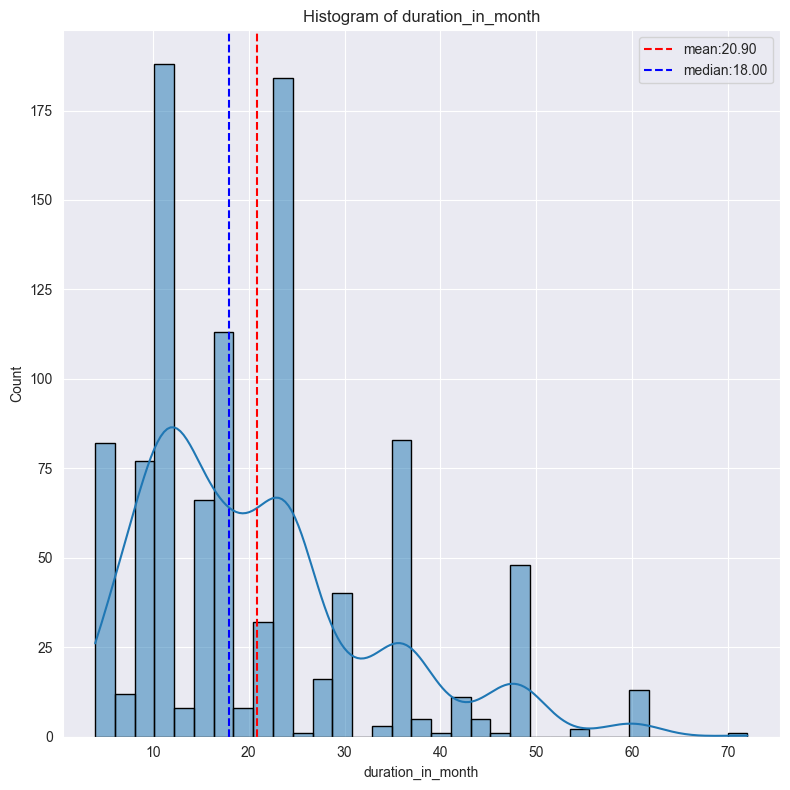

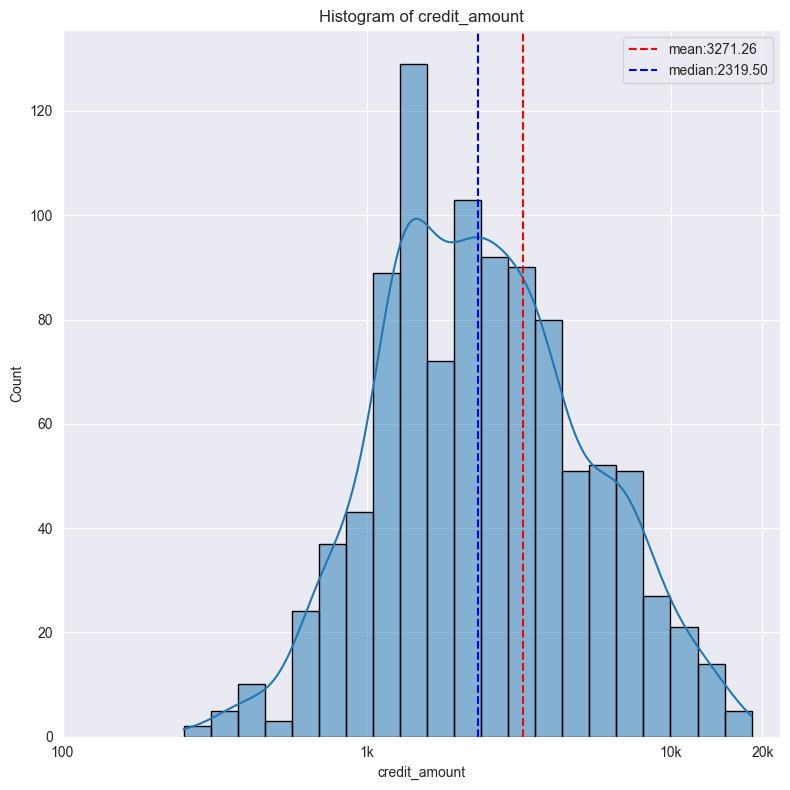

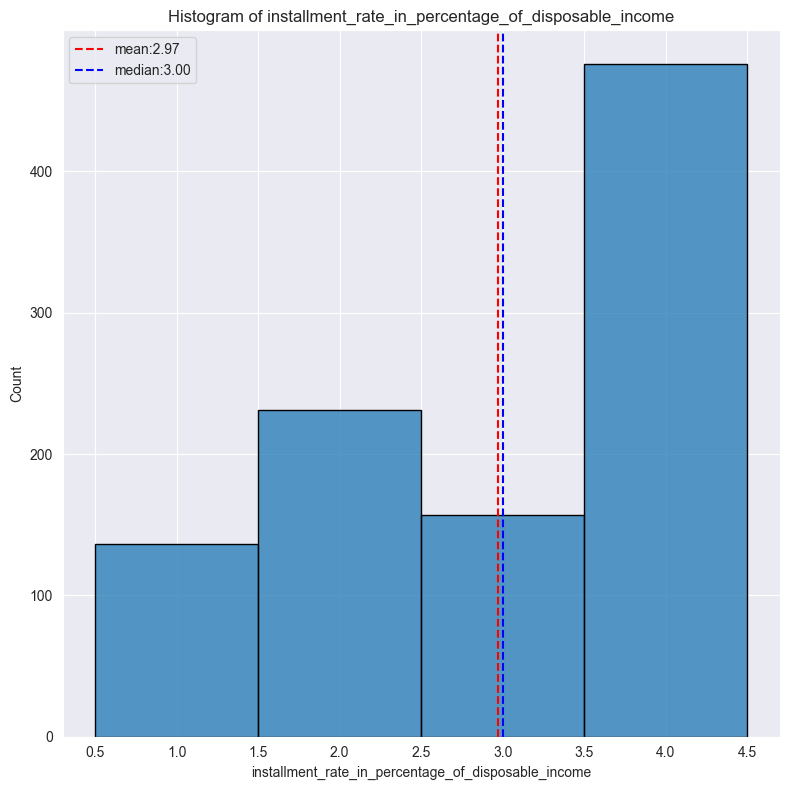

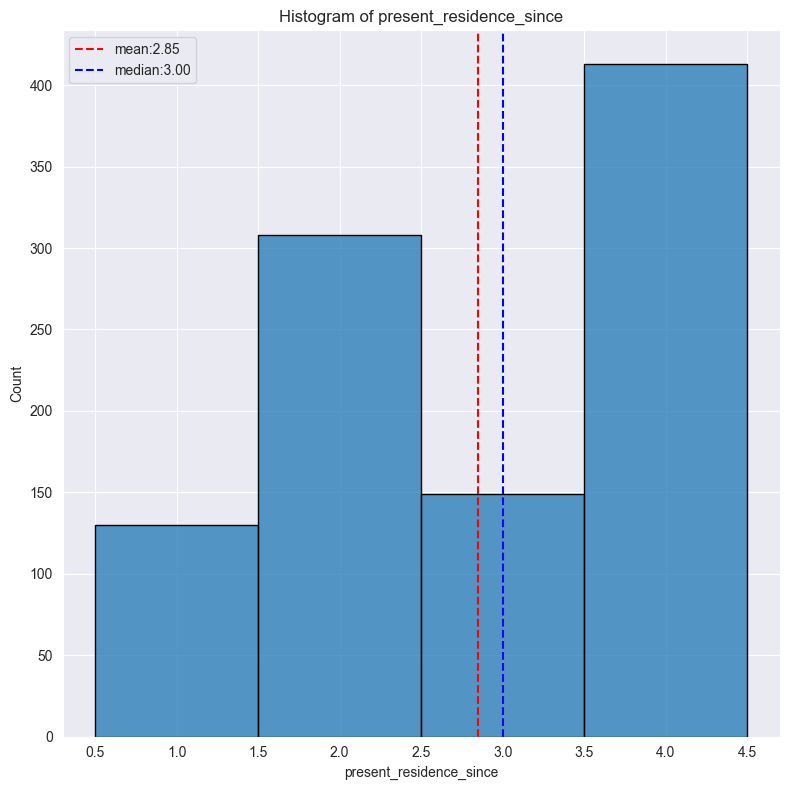

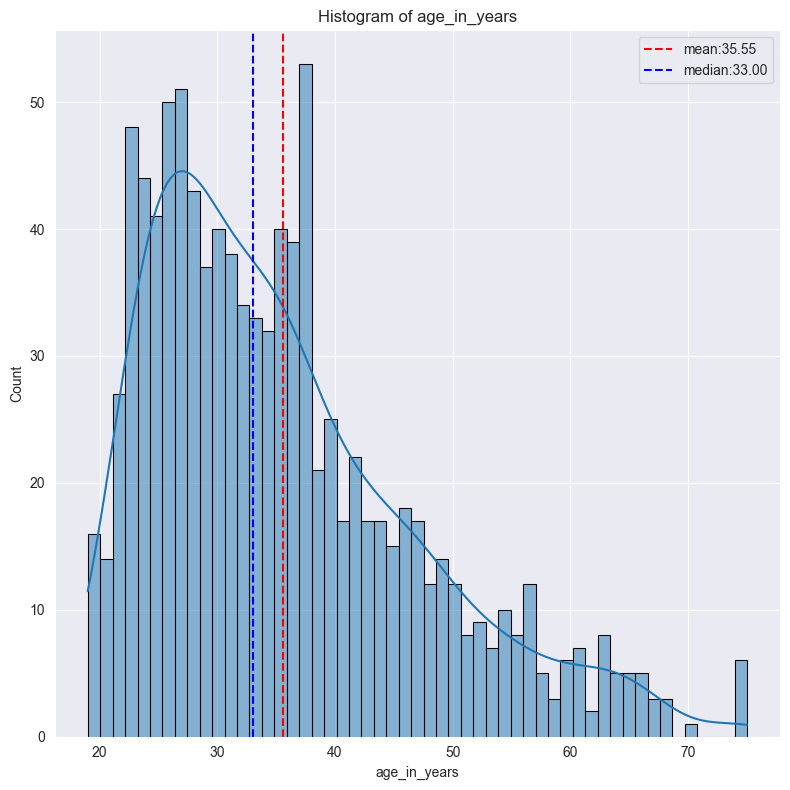

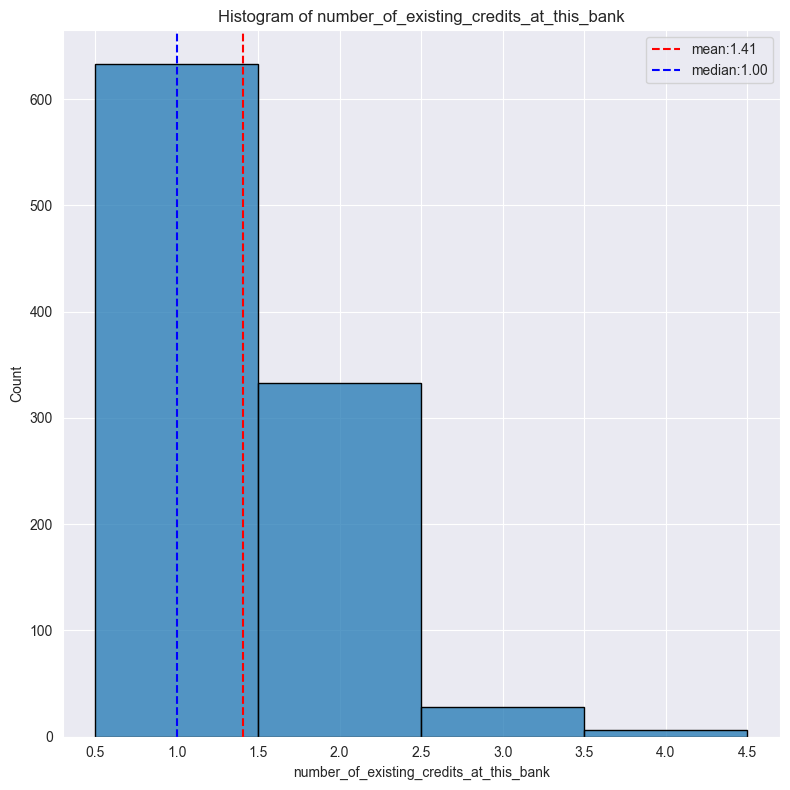

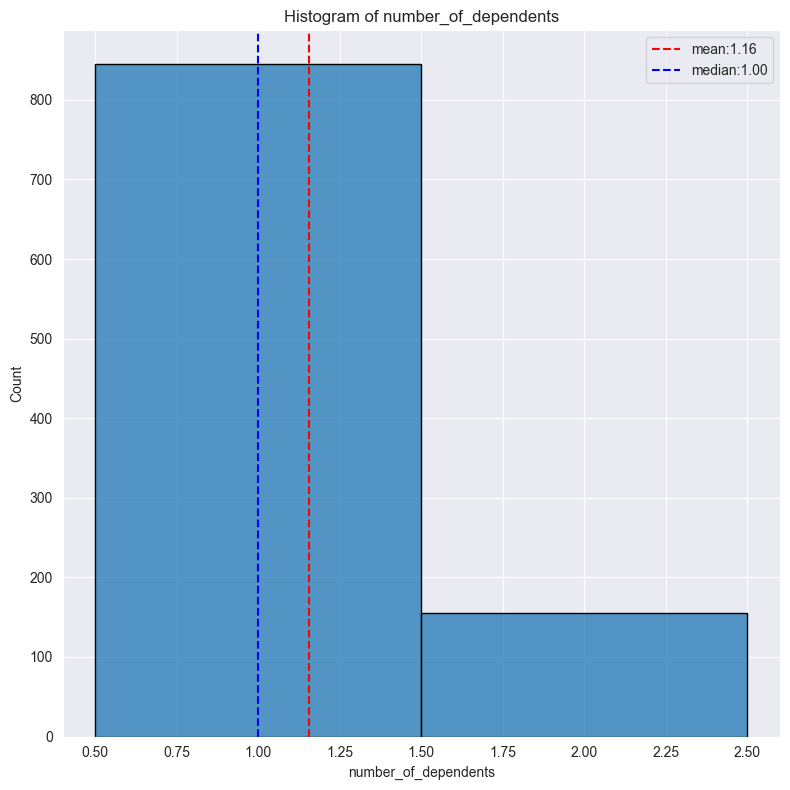

In [15]:
for col, vtype in variable_types.items():
    if vtype == 'numeric_discrete':
        data = df[col]
        if data.empty:
            continue

        plt.figure(figsize=[8,8])
        sns.histplot(data=data,
                     bins=len(data.unique()),
                     discrete=True,
                     edgecolor='black')

        plt.axvline(data.mean(),
                    color='red',
                    linestyle='--',
                    label=f'mean:{data.mean():.2f}')
        plt.axvline(data.median(),
                    color='b',
                    linestyle='--',
                    label=f'median:{data.median():.2f}')


        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend()
        plt.tight_layout()
        plt.show()
    elif vtype == 'numeric_continuous':
        data = df[col]
        if data.empty:
            continue
        if data.max() < 10000:
            plt.figure(figsize=[8,8])
            sns.histplot(data=data,
                         bins=len(data.unique()),
                         kde=True,
                         edgecolor='black')
        else:
            plt.figure(figsize=[8,8])
            sns.histplot(data=data,
                         log_scale=(True, False),
                         kde=True,
                         edgecolor='black')
            plt.xticks([100, 1000, 10000, 20000], labels=['100', '1k', '10k',
                                                       '20k'])

        plt.axvline(data.mean(),
                    color='red',
                    linestyle='--',
                    label=f'mean:{data.mean():.2f}')
        plt.axvline(data.median(),
                    color='b',
                    linestyle='--',
                    label=f'median:{data.median():.2f}')


        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend()
        plt.tight_layout()
        plt.show()


1.1 Description:

The histogram of credit/loan term is distributed in intervals of 6 (6, 12,
16, 24, 32) with most of the credit duration occurring between and including
12 and 24 months.

Credit amount id distributed normally, on a logarithmic scale around the
median, which is
\$2300\.
However, The mean of the credit amount is \$3271.26 as shown on the graph by
the
red,
dotted vertical line, with most credits being above \$1,000 and \$10,000. This
suggests, and will be confirmed by later analysis, that most people are
opening credit lines for small-medium sized purchases. I do want to emphasize
 that this dataset uses data from 1990; theoretically accounting for
 inflation in MDR value as well as price inflation of individual products and
  product categories, these are medium-sized singular purchases, or
  large-quantity purchases of relatively low-cost items.

The interest rate on all credit is between 1.0% and 4.0% inclusive, with most
 credits being issued at a rate of 4.0%. When accounting for the other
 issuances with interest rates lower than 4.0%, we see a median interest rate
  at 3.0% APR (assuming).

Most people have been in their current place of residence for 4 or more
years. However, a good chunk includes those who have only been at their
current place of residence of 2 years only. The mean term of residence is 2
.85 years, with the median term being 3 years (we will use 3 for prediction).

The distribution of the age of customers is a right-tailed distribution, with
 most customers being under the age of 60. A large chunk of individuals are
 between the ages of 20 and 40. The mean age of customers is 35.5

Folks, mostly only have 1 or 2 pre-existing credit line with this bank. Given
 the age distribution we can infer that these may be mortgages, car payments,
  credit cards, personal lines of credit
 etc. However, a granular analysis is necessary on what these other credit
 lines are. Less than 50 people have more than 2 credit lines.

A large majority of individuals only have 1 dependent (maybe a partner or
child). Between 100 and 200 people have 2 dependents. No one in this dataset
has more than 2 dependents.

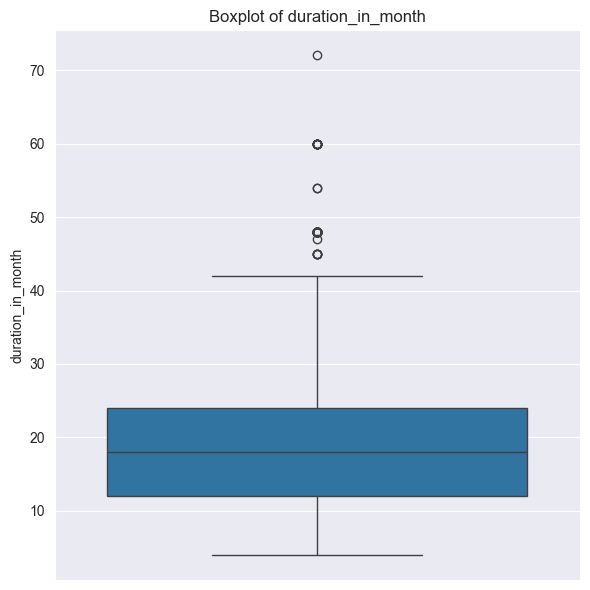

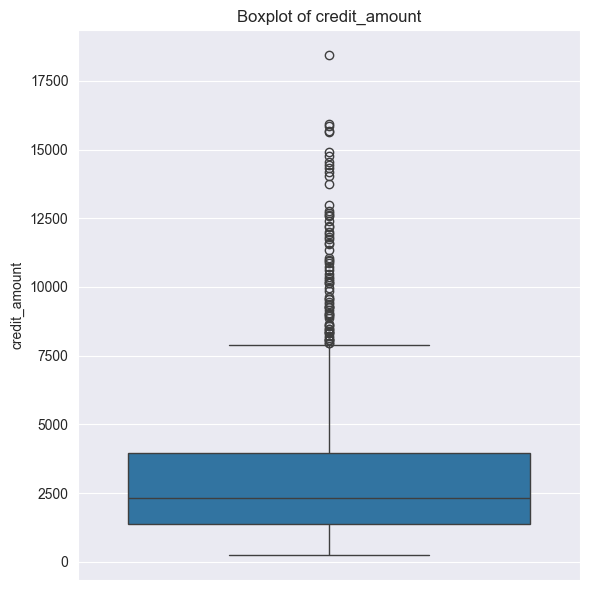

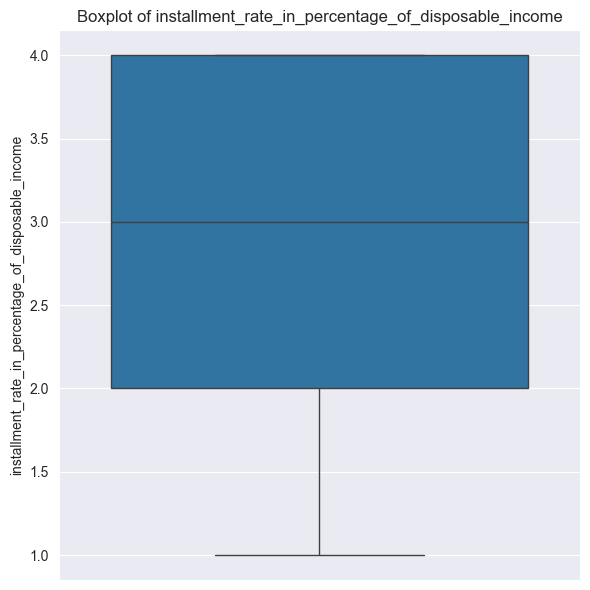

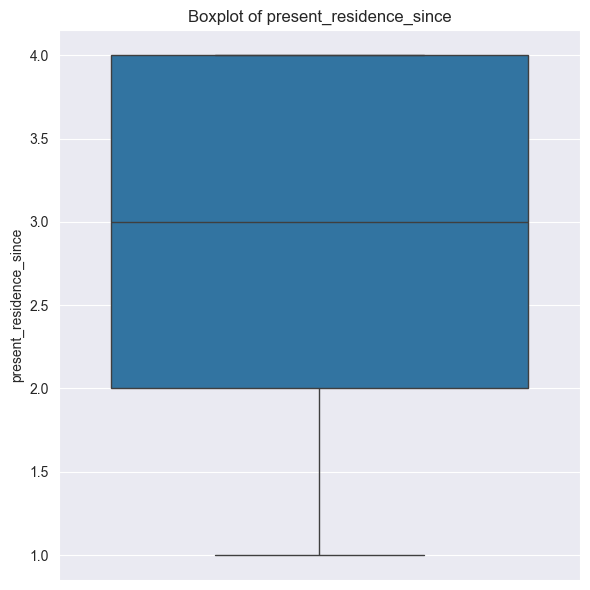

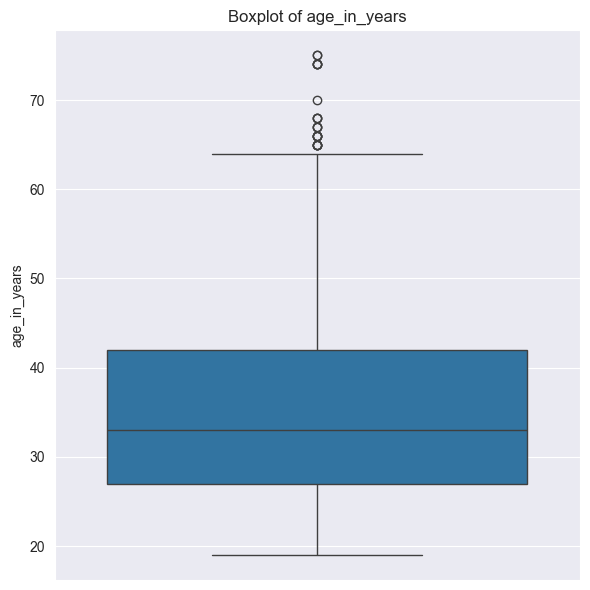

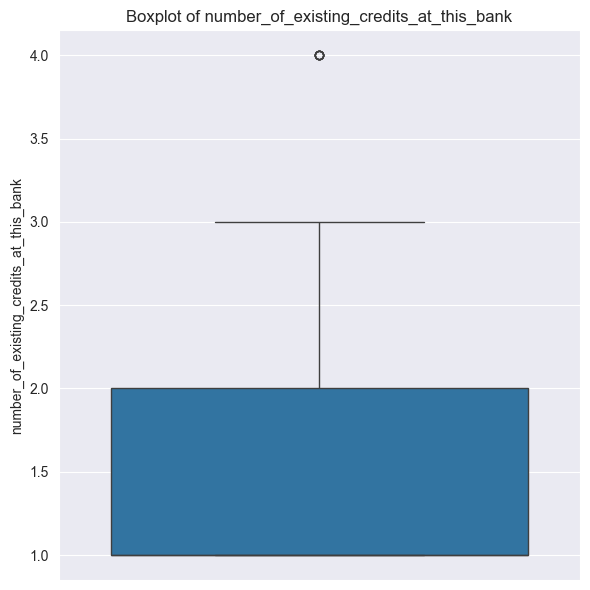

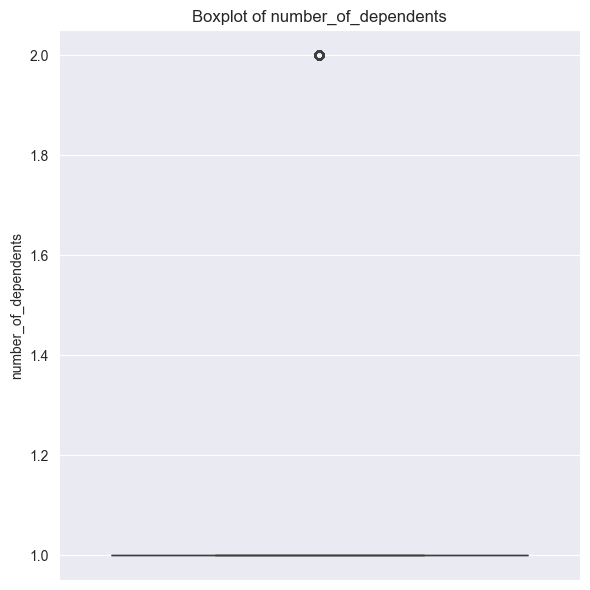

In [16]:
for col in numeric_columns:
    plt.figure(figsize=[6, 6])
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [17]:
df['number_of_dependents'].value_counts()

number_of_dependents
1    845
2    155
Name: count, dtype: int64

1.2 Outlier handling required for:

a. Credit amount; Large number of outliers above upper bound;

b. duration of credit/repayment term; small number of outliers above upper
bound;

c. Age of customers, small number above upper bound;

d. number of existing credits; 4 lines of credits is an outlier in the data;

e. 2 dependents are an outlier



Plotting distribution of categorical data

1. loop through categorical_columns and df[col].value_counts().plot(kind='bar')

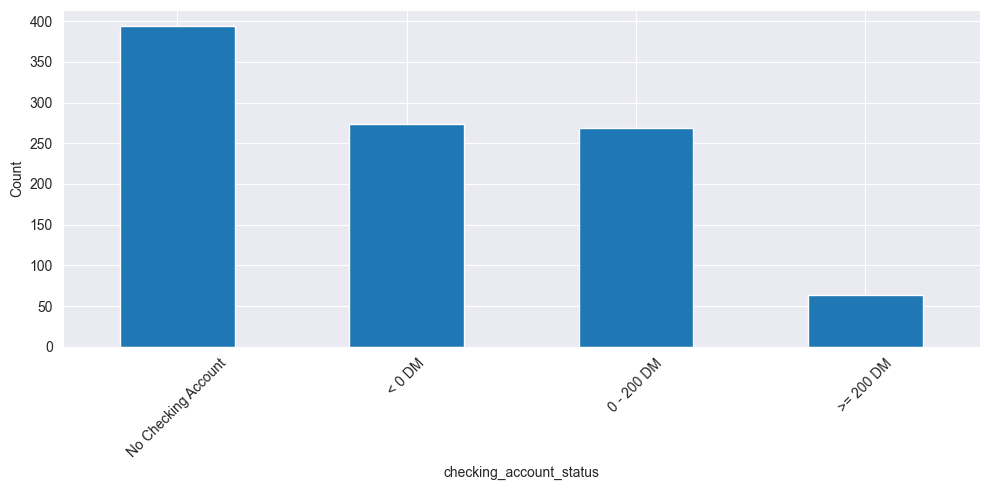

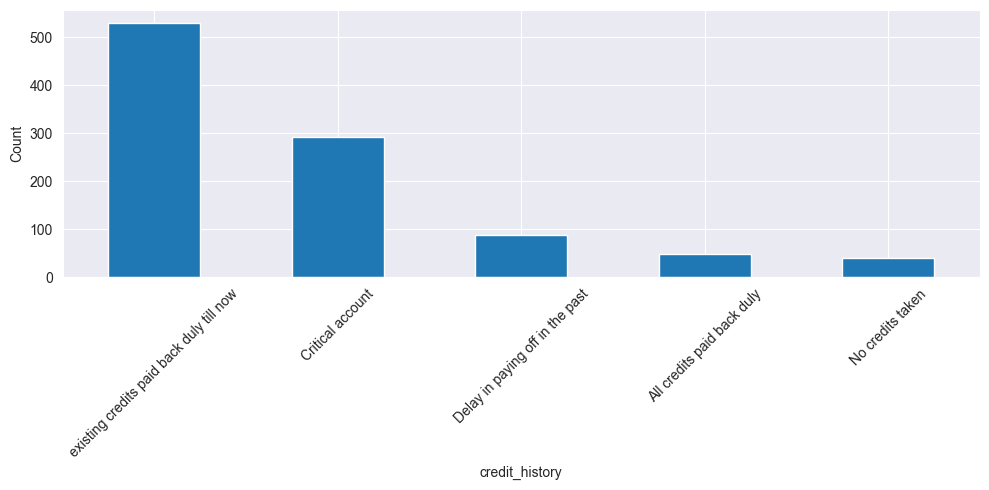

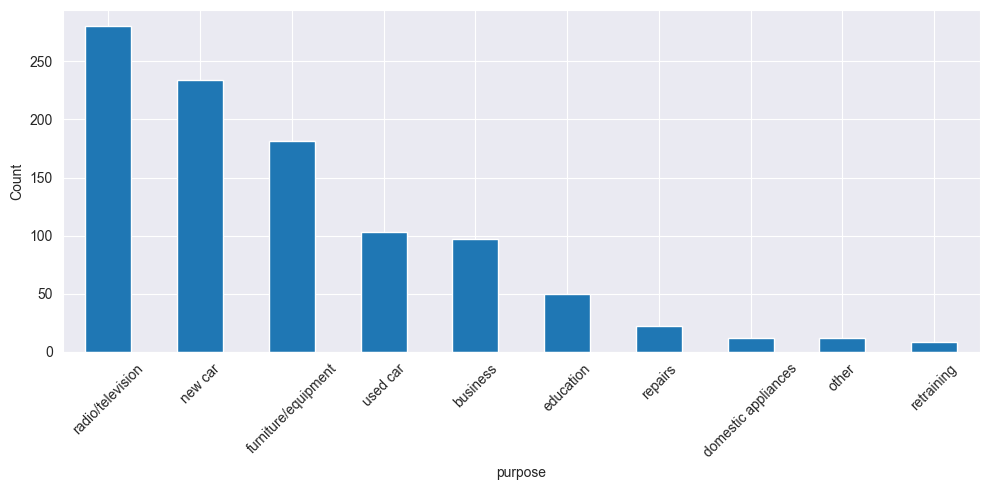

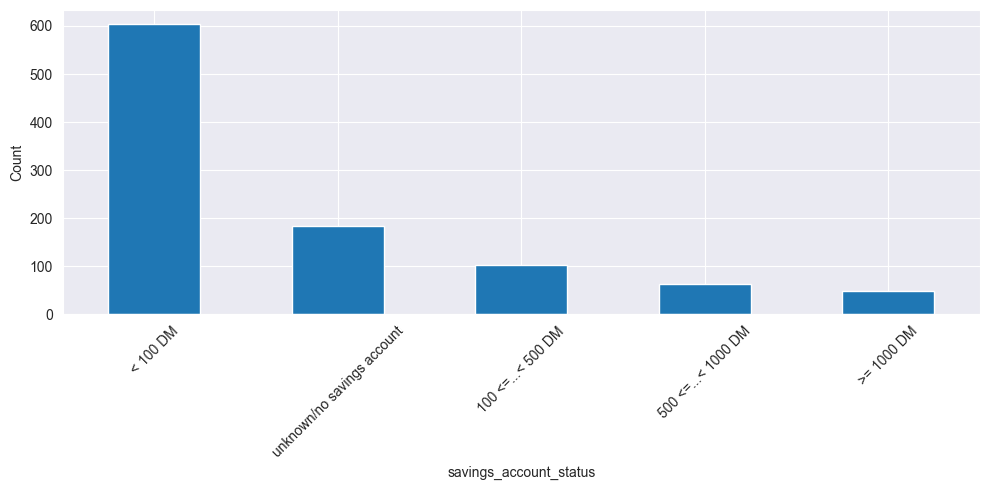

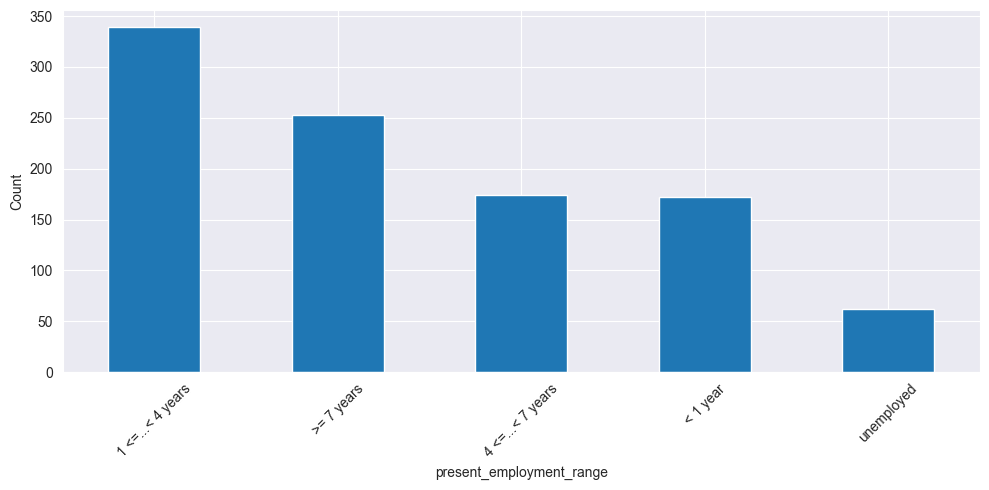

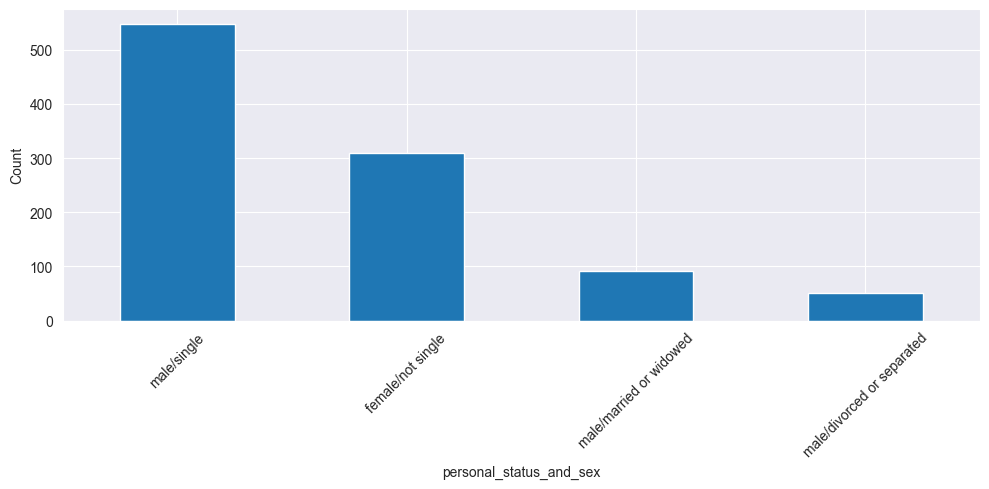

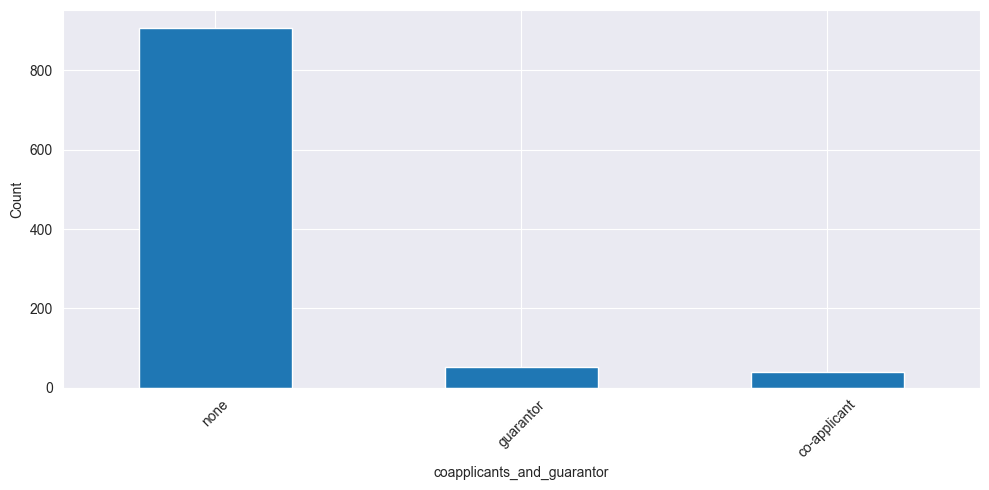

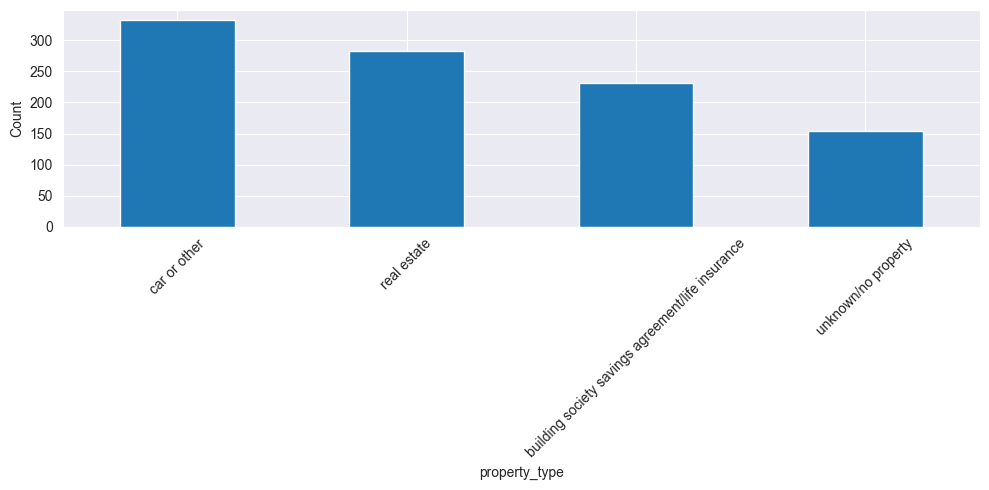

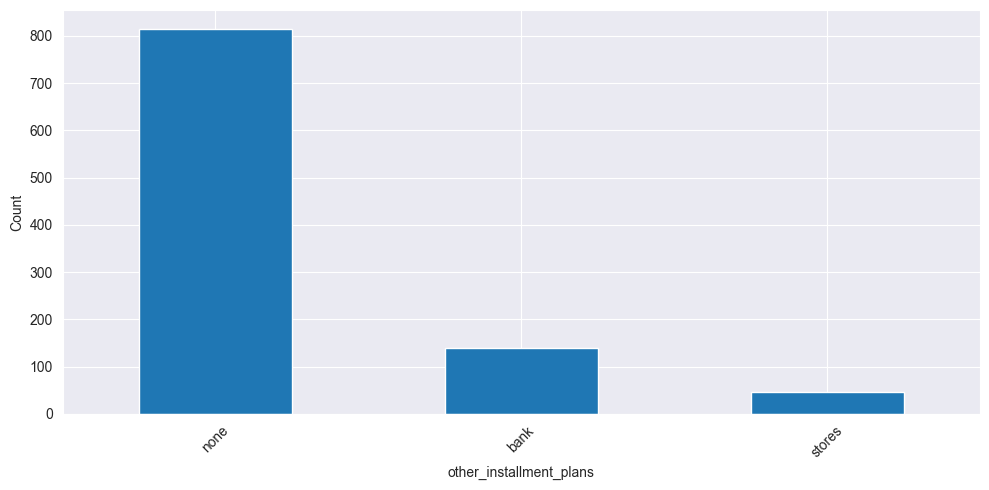

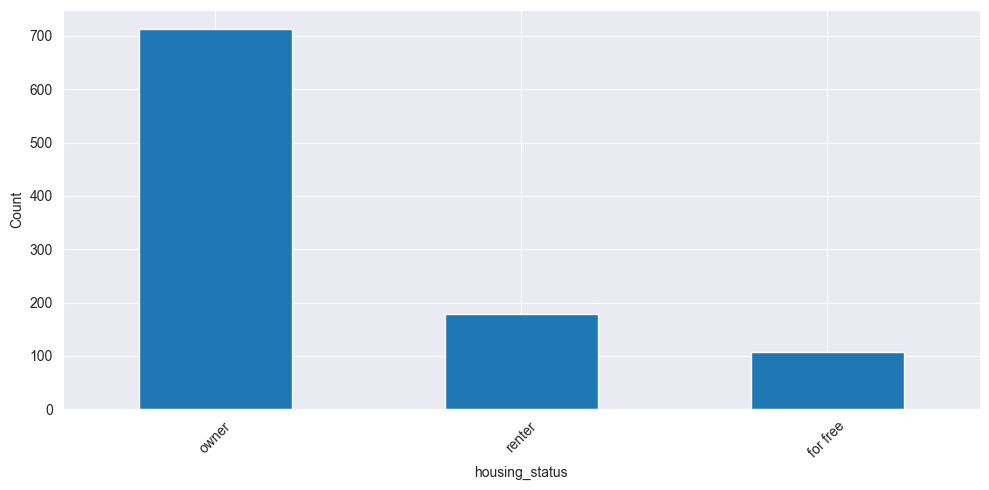

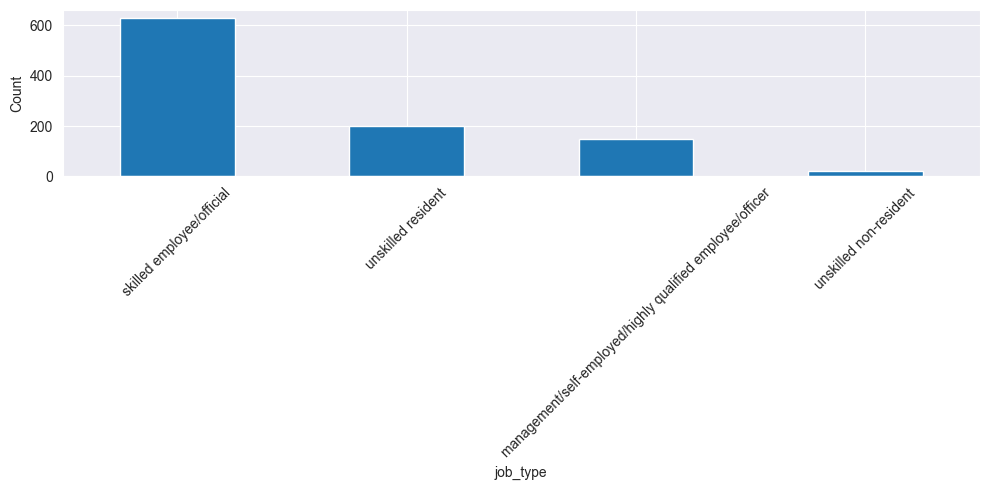

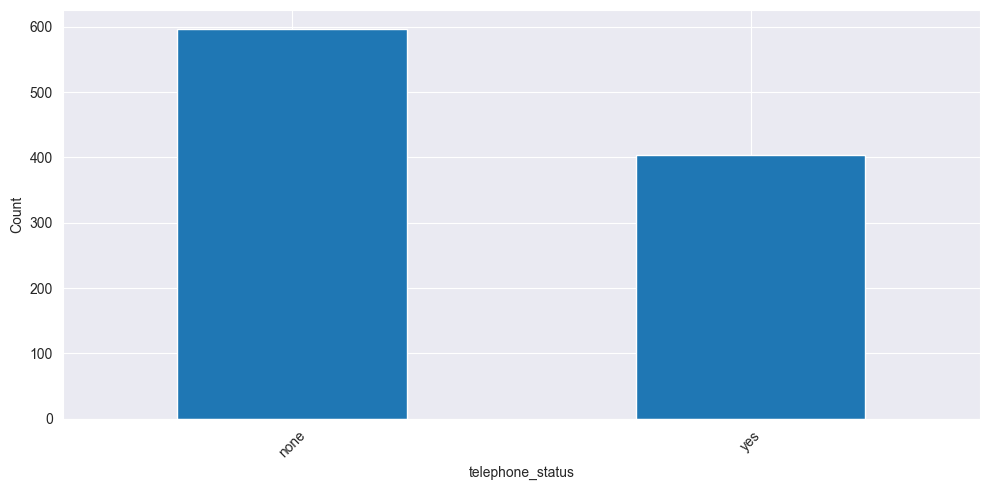

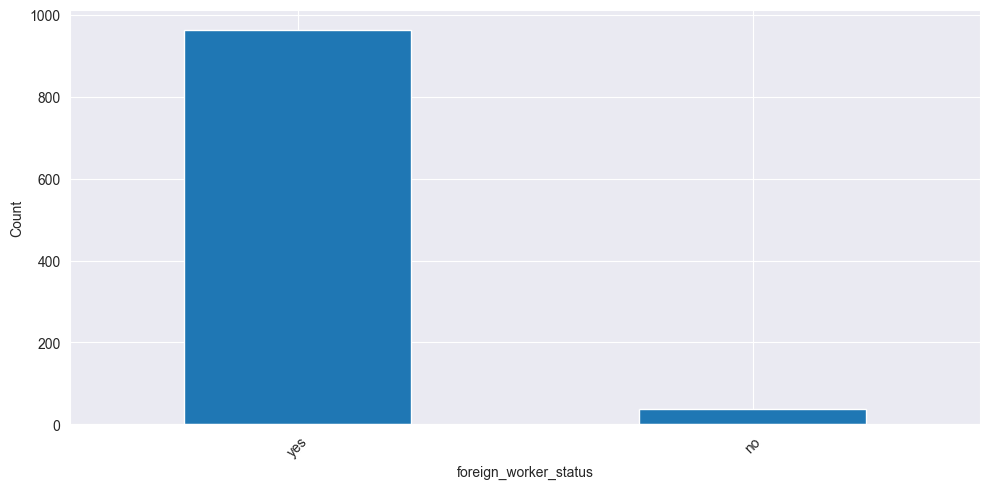

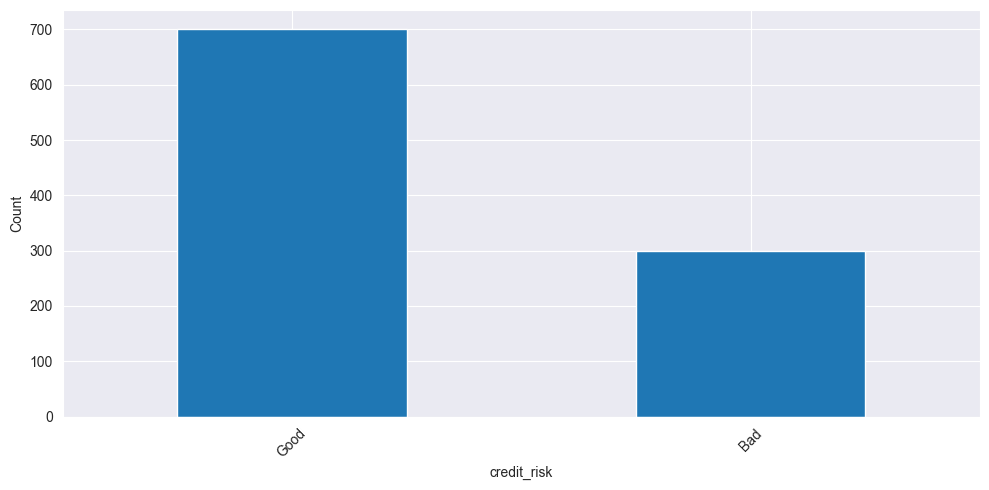

In [18]:
for col in categorical_columns:
    plt.figure(figsize=[10, 5])
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Bivariate Association

Numeric-to-Numeric

1. create pearson and spearman matrices in variables
2. Plot heatmaps of matrices (

In [19]:
pearson_matrix_numeric = (df[numeric_columns].corr
                  (method='pearson'))

spearman_matrix_numeric = df[numeric_columns].corr(method='spearman')

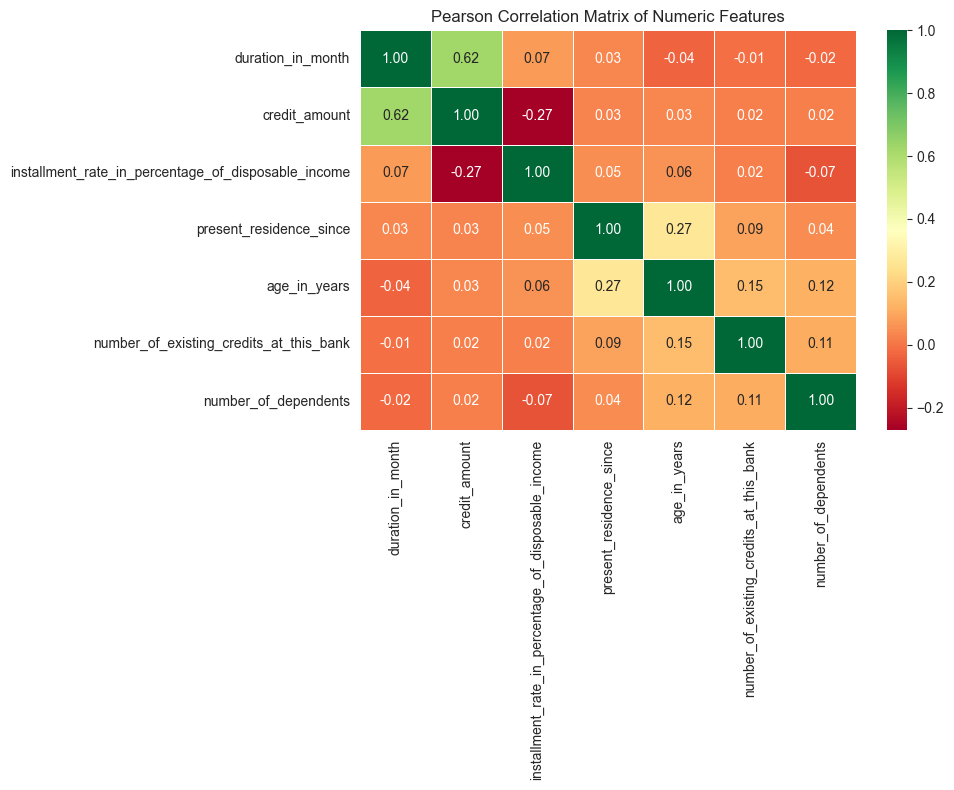

In [20]:
plt.figure(figsize=[10,8])
sns.heatmap(pearson_matrix_numeric, annot=True, cmap='RdYlGn', fmt='.2f',
            linewidths=.5)
plt.title('Pearson Correlation Matrix of Numeric Features', fontsize=12)
plt.tight_layout()
plt.show()

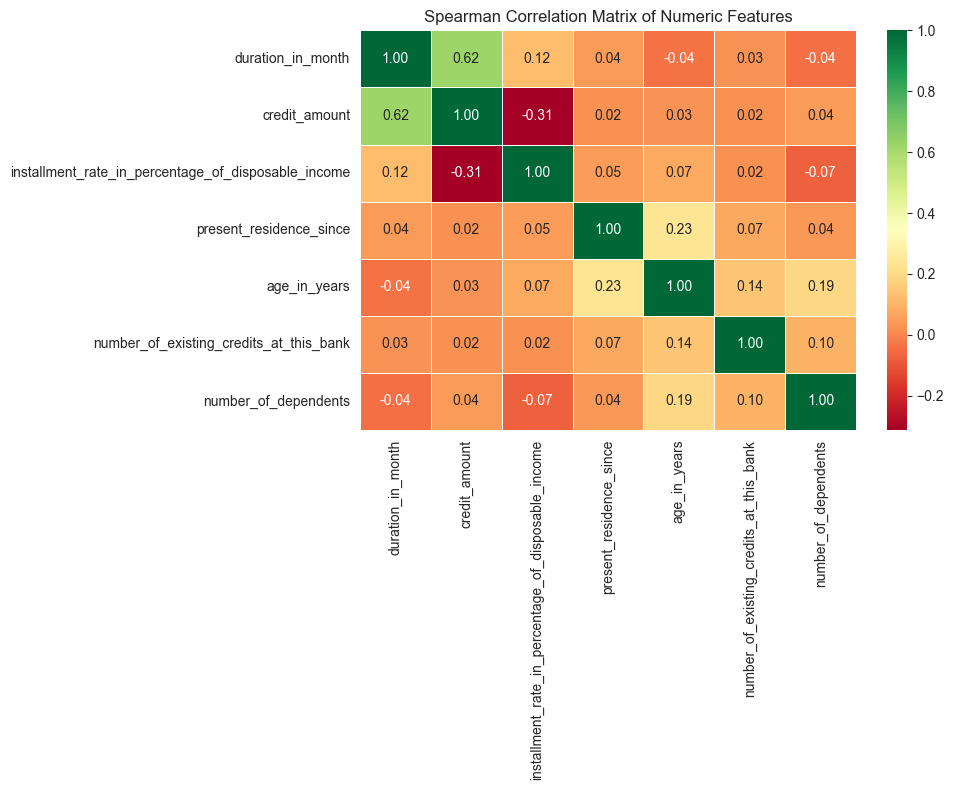

In [21]:
plt.figure(figsize=[10,8])
sns.heatmap(spearman_matrix_numeric, annot=True, cmap='RdYlGn', fmt='.2f',
            linewidths=.5)
plt.title('Spearman Correlation Matrix of Numeric Features', fontsize=12)
plt.tight_layout()
plt.show()

Plotting relationships for further analysis

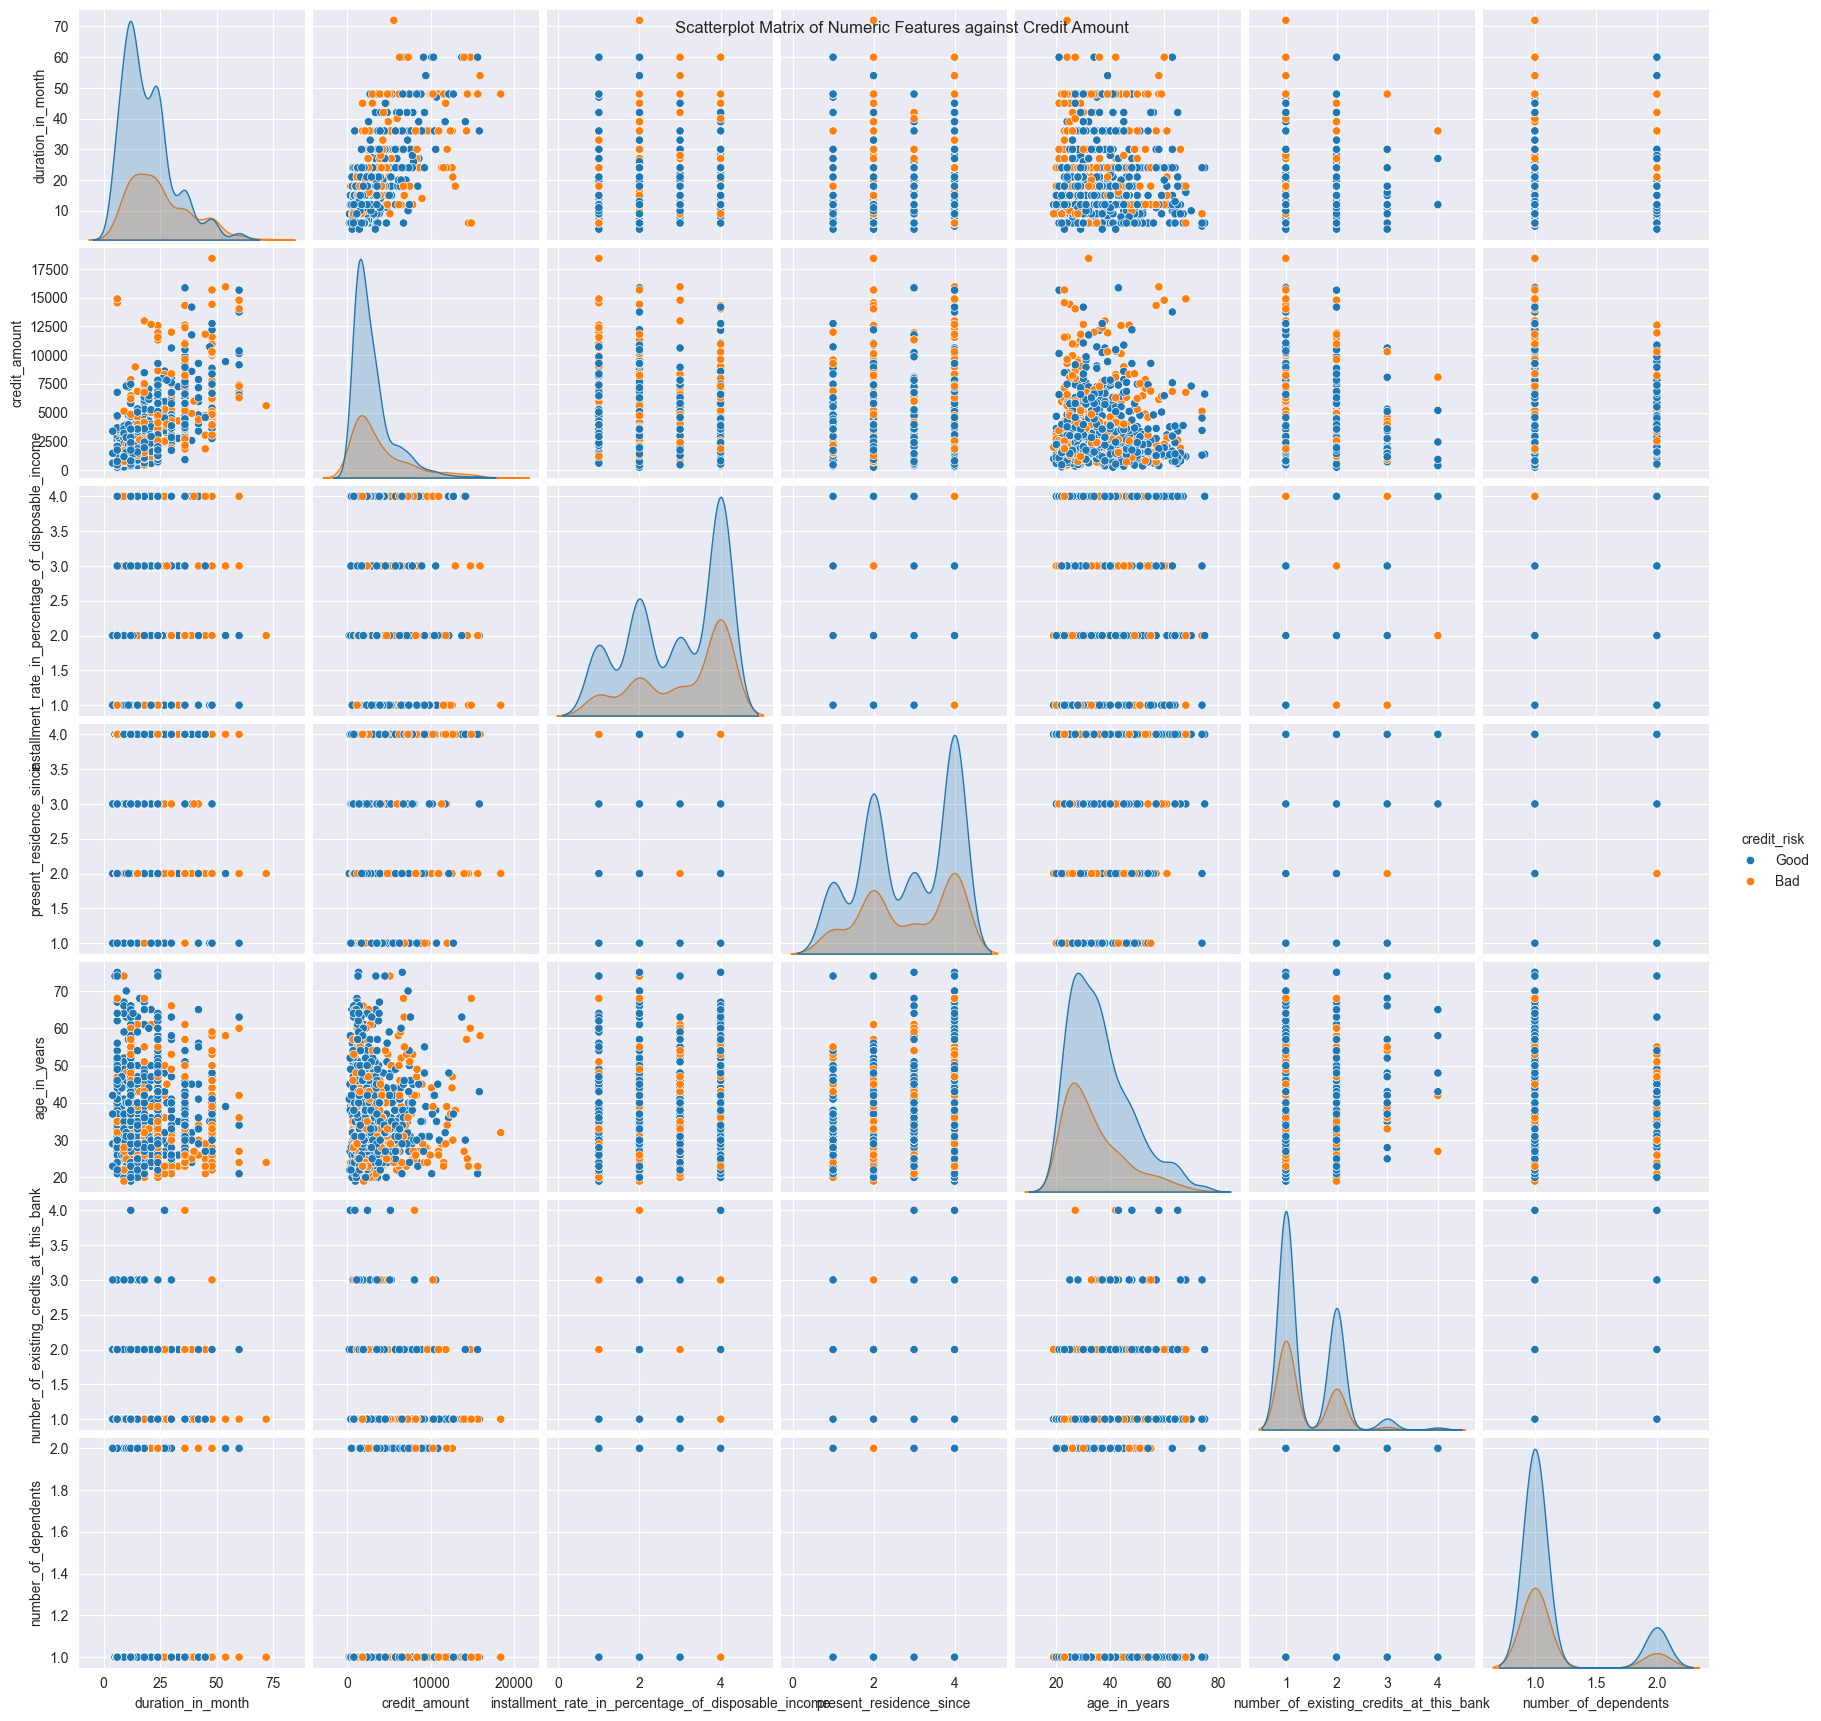

In [22]:
numeric_pairplot = sns.pairplot(df, vars=numeric_columns, hue='credit_risk',
                                diag_kind='kde', height=2.5)

numeric_pairplot.fig.suptitle('Scatterplot Matrix of Numeric Features against'
                              ' Credit Amount')
plt.show()

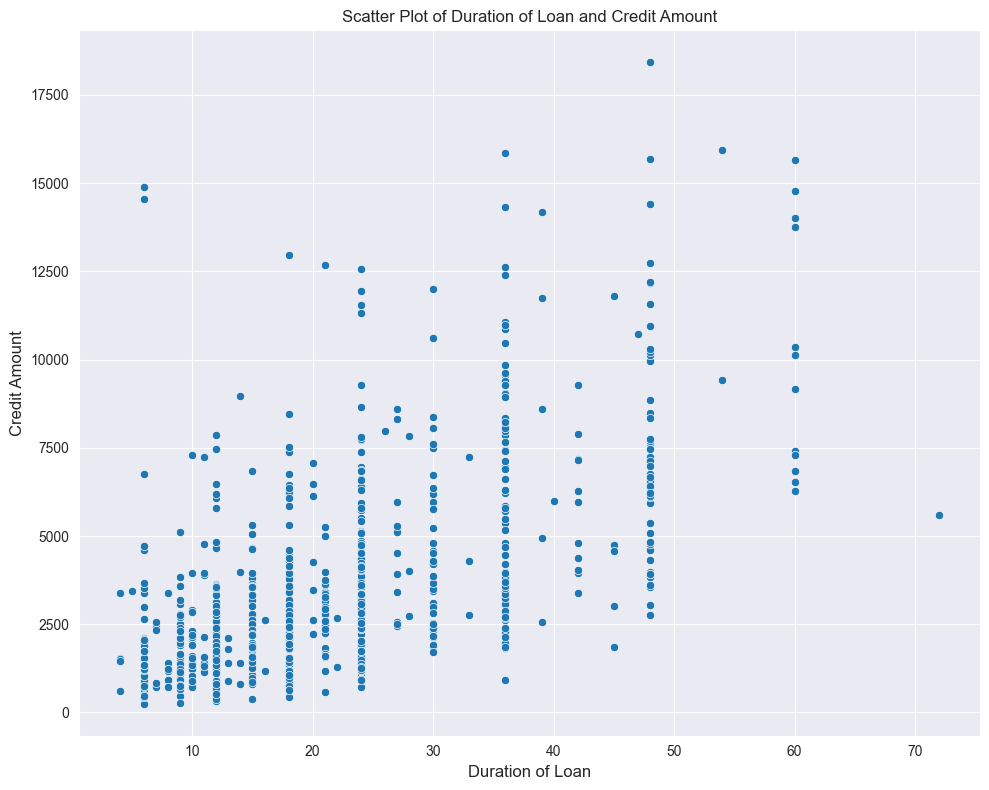

In [23]:
plt.figure(figsize=[10,8])
sns.scatterplot(x=df['duration_in_month'], y=df['credit_amount'])
plt.title('Scatter Plot of Duration of Loan and Credit Amount', fontsize=12)
plt.xlabel('Duration of Loan', fontsize=12)
plt.ylabel('Credit Amount', fontsize=12)
plt.tight_layout()
plt.show()

Categorical-to-Categorical (CROSSTABS!)

In [24]:
nominal_cat_variables = [col for col, vtype in variable_types.items() if
                         vtype == 'nominal']

ordinal_cat_variables = [col for col, vtype in variable_types.items() if vtype == 'ordinal']

Raw Contingency Table

In [25]:
for col in categorical_columns:
    raw_contingency_table = pd.crosstab(df[col], df['credit_risk'])
    print(raw_contingency_table)

credit_risk              Bad  Good
checking_account_status           
0 - 200 DM               105   164
< 0 DM                   135   139
>= 200 DM                 14    49
No Checking Account       46   348
credit_risk                               Bad  Good
credit_history                                     
All credits paid back duly                 28    21
Critical account                           50   243
Delay in paying off in the past            28    60
No credits taken                           25    15
existing credits paid back duly till now  169   361
credit_risk          Bad  Good
purpose                       
business              34    63
domestic appliances    4     8
education             22    28
furniture/equipment   58   123
new car               89   145
other                  5     7
radio/television      62   218
repairs                8    14
retraining             1     8
used car              17    86
credit_risk                 Bad  Good
savings_account_

Horizontal Analysis

credit_risk                Bad   Good
checking_account_status              
0 - 200 DM               39.03  60.97
< 0 DM                   49.27  50.73
>= 200 DM                22.22  77.78
No Checking Account      11.68  88.32
credit_risk                Bad   Good
checking_account_status              
0 - 200 DM               39.03  60.97
< 0 DM                   49.27  50.73
>= 200 DM                22.22  77.78
No Checking Account      11.68  88.32


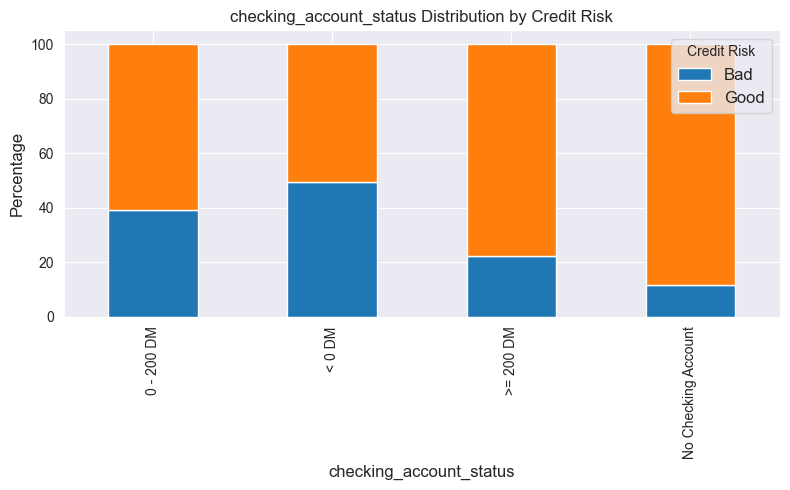

credit_risk                                 Bad   Good
credit_history                                        
All credits paid back duly                57.14  42.86
Critical account                          17.06  82.94
Delay in paying off in the past           31.82  68.18
No credits taken                          62.50  37.50
existing credits paid back duly till now  31.89  68.11
credit_risk                                 Bad   Good
credit_history                                        
All credits paid back duly                57.14  42.86
Critical account                          17.06  82.94
Delay in paying off in the past           31.82  68.18
No credits taken                          62.50  37.50
existing credits paid back duly till now  31.89  68.11


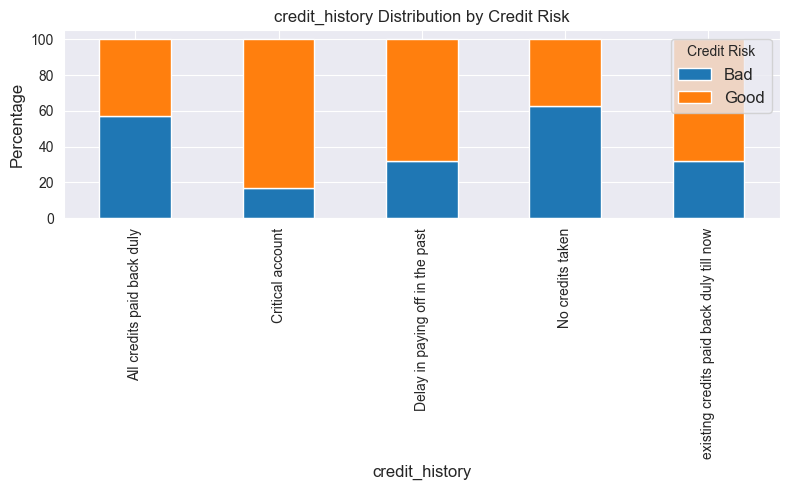

credit_risk            Bad   Good
purpose                          
business             35.05  64.95
domestic appliances  33.33  66.67
education            44.00  56.00
furniture/equipment  32.04  67.96
new car              38.03  61.97
other                41.67  58.33
radio/television     22.14  77.86
repairs              36.36  63.64
retraining           11.11  88.89
used car             16.50  83.50
credit_risk            Bad   Good
purpose                          
business             35.05  64.95
domestic appliances  33.33  66.67
education            44.00  56.00
furniture/equipment  32.04  67.96
new car              38.03  61.97
other                41.67  58.33
radio/television     22.14  77.86
repairs              36.36  63.64
retraining           11.11  88.89
used car             16.50  83.50


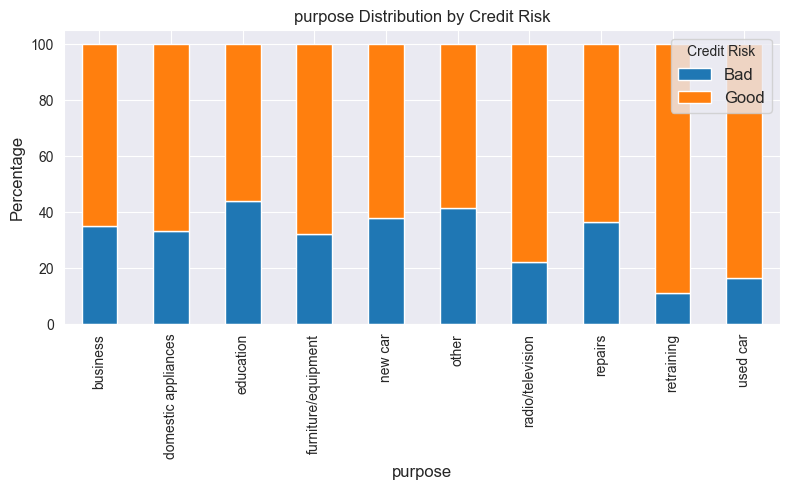

credit_risk                   Bad   Good
savings_account_status                  
100 <=...< 500 DM           33.01  66.99
500 <=...< 1000 DM          17.46  82.54
< 100 DM                    35.99  64.01
>= 1000 DM                  12.50  87.50
unknown/no savings account  17.49  82.51
credit_risk                   Bad   Good
savings_account_status                  
100 <=...< 500 DM           33.01  66.99
500 <=...< 1000 DM          17.46  82.54
< 100 DM                    35.99  64.01
>= 1000 DM                  12.50  87.50
unknown/no savings account  17.49  82.51


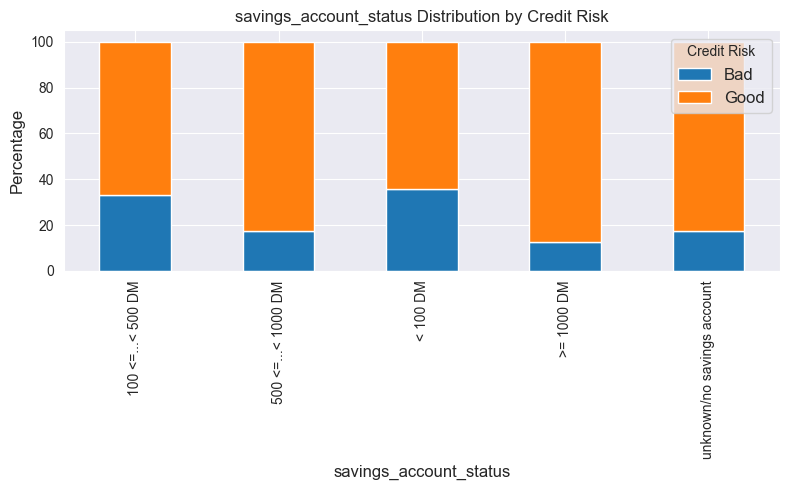

credit_risk                 Bad   Good
present_employment_range              
1 <=...< 4 years          30.68  69.32
4 <=...< 7 years          22.41  77.59
< 1 year                  40.70  59.30
>= 7 years                25.30  74.70
unemployed                37.10  62.90
credit_risk                 Bad   Good
present_employment_range              
1 <=...< 4 years          30.68  69.32
4 <=...< 7 years          22.41  77.59
< 1 year                  40.70  59.30
>= 7 years                25.30  74.70
unemployed                37.10  62.90


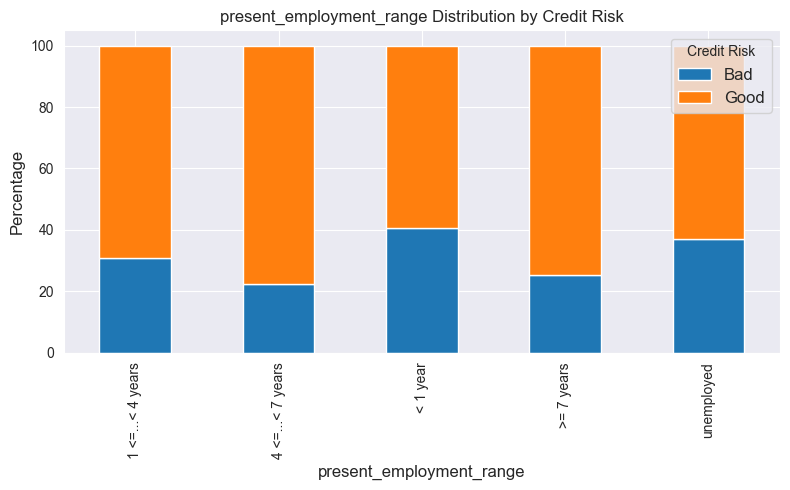

credit_risk                   Bad   Good
personal_status_and_sex                 
female/not single           35.16  64.84
male/divorced or separated  40.00  60.00
male/married or widowed     27.17  72.83
male/single                 26.64  73.36
credit_risk                   Bad   Good
personal_status_and_sex                 
female/not single           35.16  64.84
male/divorced or separated  40.00  60.00
male/married or widowed     27.17  72.83
male/single                 26.64  73.36


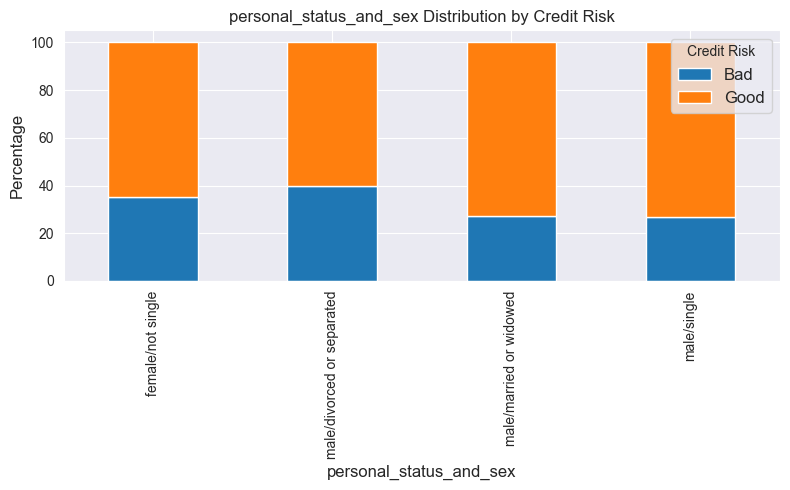

credit_risk                   Bad   Good
coapplicants_and_guarantor              
co-applicant                43.90  56.10
guarantor                   19.23  80.77
none                        29.99  70.01
credit_risk                   Bad   Good
coapplicants_and_guarantor              
co-applicant                43.90  56.10
guarantor                   19.23  80.77
none                        29.99  70.01


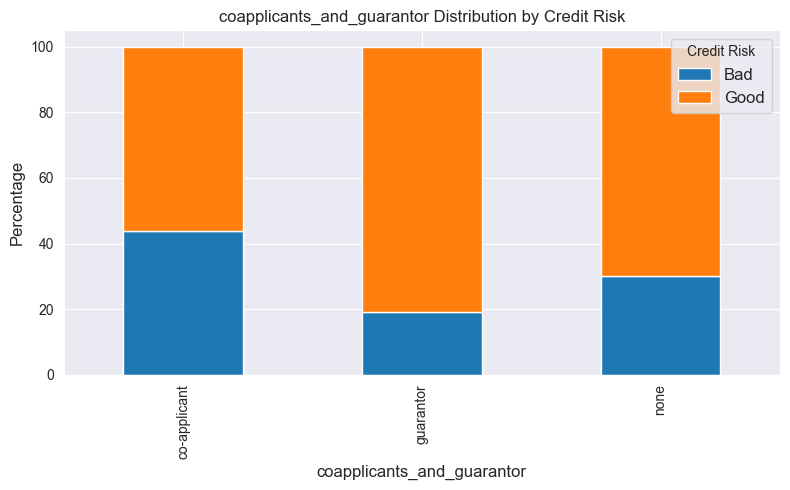

credit_risk                                          Bad   Good
property_type                                                  
building society savings agreement/life insurance  30.60  69.40
car or other                                       30.72  69.28
real estate                                        21.28  78.72
unknown/no property                                43.51  56.49
credit_risk                                          Bad   Good
property_type                                                  
building society savings agreement/life insurance  30.60  69.40
car or other                                       30.72  69.28
real estate                                        21.28  78.72
unknown/no property                                43.51  56.49


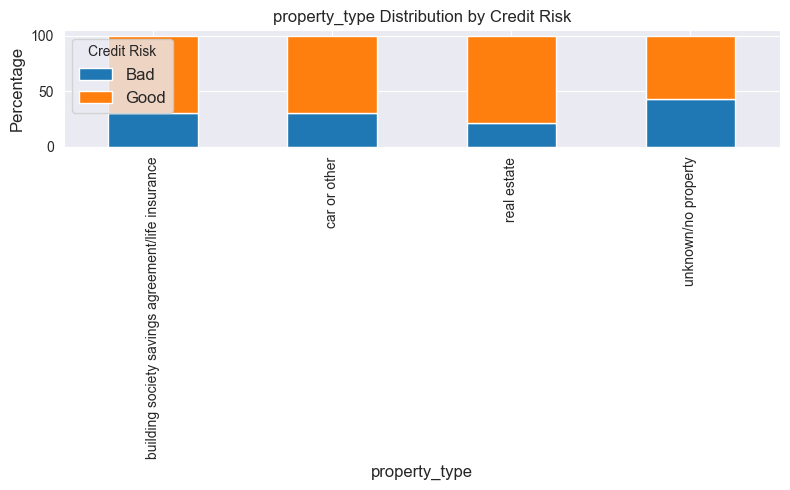

credit_risk                Bad   Good
other_installment_plans              
bank                     41.01  58.99
none                     27.52  72.48
stores                   40.43  59.57
credit_risk                Bad   Good
other_installment_plans              
bank                     41.01  58.99
none                     27.52  72.48
stores                   40.43  59.57


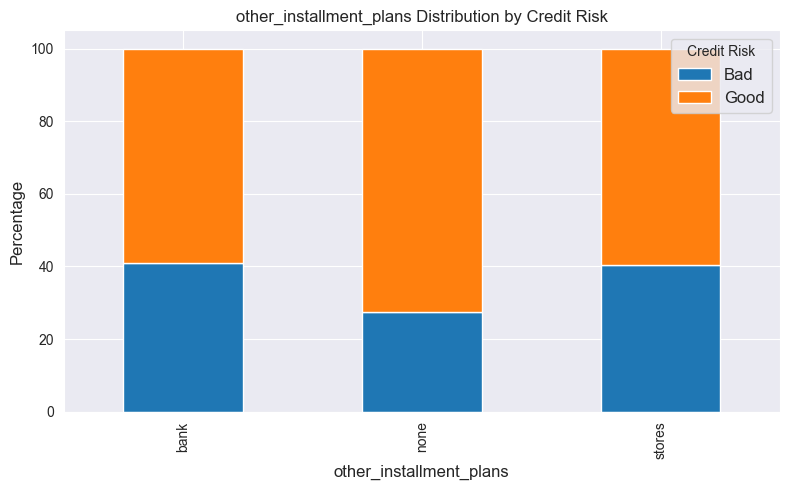

credit_risk       Bad   Good
housing_status              
for free        40.74  59.26
owner           26.09  73.91
renter          39.11  60.89
credit_risk       Bad   Good
housing_status              
for free        40.74  59.26
owner           26.09  73.91
renter          39.11  60.89


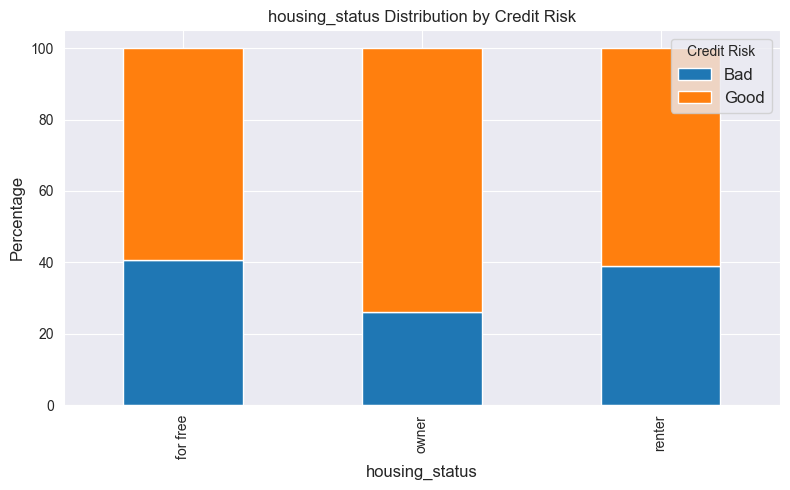

credit_risk                                           Bad   Good
job_type                                                        
management/self-employed/highly qualified emplo...  34.46  65.54
skilled employee/official                           29.52  70.48
unskilled non-resident                              31.82  68.18
unskilled resident                                  28.00  72.00
credit_risk                                           Bad   Good
job_type                                                        
management/self-employed/highly qualified emplo...  34.46  65.54
skilled employee/official                           29.52  70.48
unskilled non-resident                              31.82  68.18
unskilled resident                                  28.00  72.00


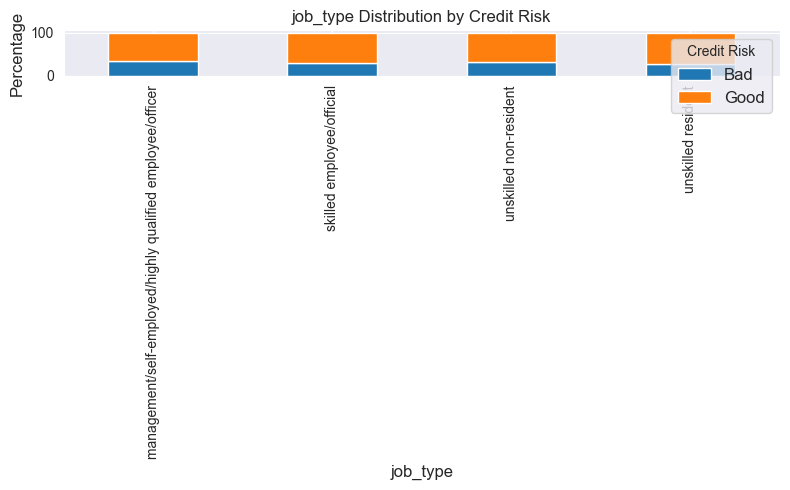

credit_risk         Bad   Good
telephone_status              
none              31.38  68.62
yes               27.97  72.03
credit_risk         Bad   Good
telephone_status              
none              31.38  68.62
yes               27.97  72.03


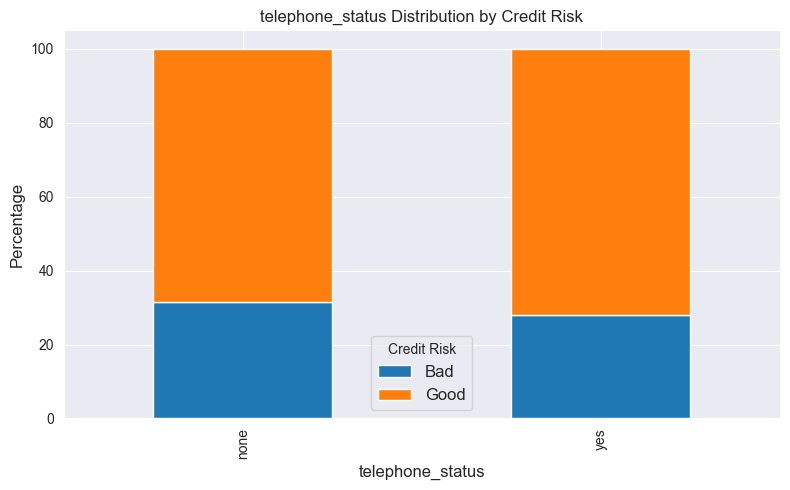

credit_risk              Bad   Good
foreign_worker_status              
no                     10.81  89.19
yes                    30.74  69.26
credit_risk              Bad   Good
foreign_worker_status              
no                     10.81  89.19
yes                    30.74  69.26


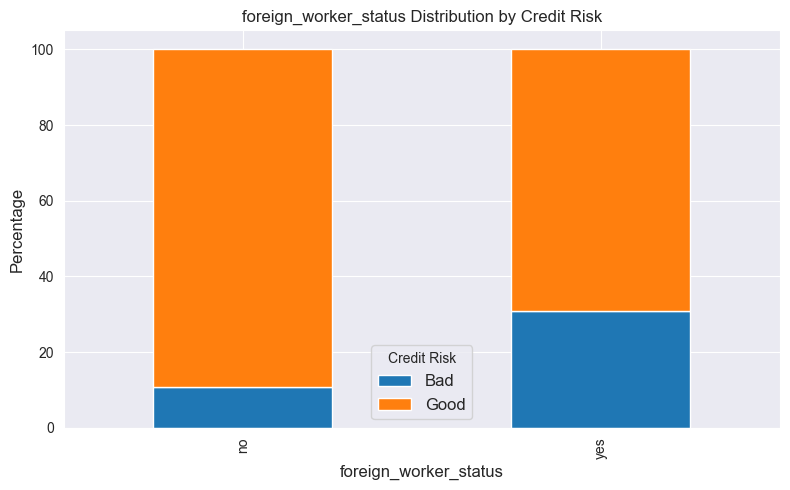

credit_risk    Bad   Good
credit_risk              
Bad          100.0    0.0
Good           0.0  100.0
credit_risk    Bad   Good
credit_risk              
Bad          100.0    0.0
Good           0.0  100.0


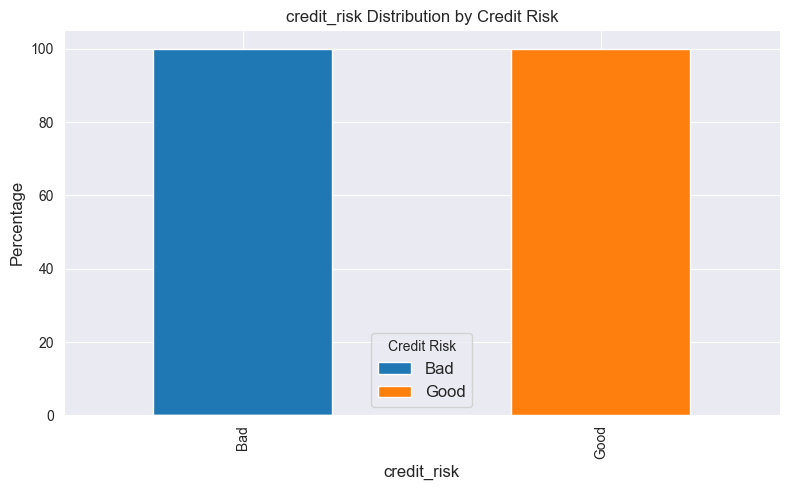

In [26]:
for col in categorical_columns:
    row_contingency_table_pct = pd.crosstab(df[col], df['credit_risk'],
                                        normalize='index') * 100
    print(row_contingency_table_pct.round(2))

    print(row_contingency_table_pct.round(2))
    row_contingency_table_pct.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'{col} Distribution by Credit Risk', fontsize = 12)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.legend(title='Credit Risk', fontsize=12)
    plt.tight_layout()
    plt.show()

Vertical Analysis

credit_risk                Bad   Good
checking_account_status              
0 - 200 DM               35.00  23.43
< 0 DM                   45.00  19.86
>= 200 DM                 4.67   7.00
No Checking Account      15.33  49.71


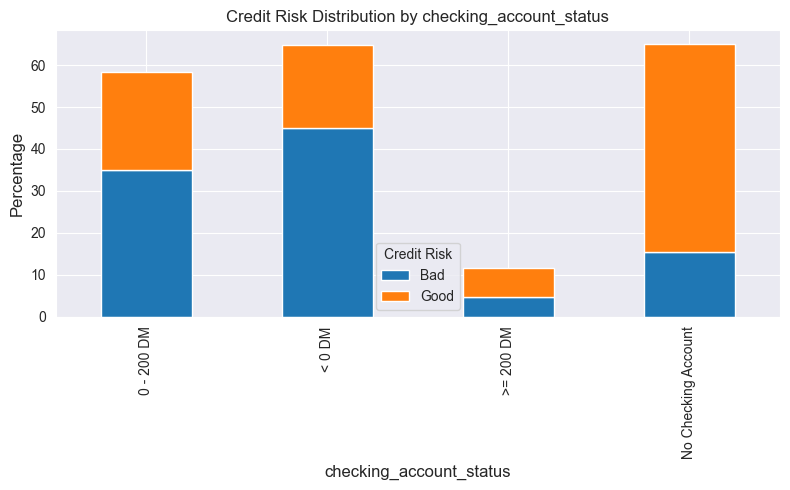

credit_risk                                 Bad   Good
credit_history                                        
All credits paid back duly                 9.33   3.00
Critical account                          16.67  34.71
Delay in paying off in the past            9.33   8.57
No credits taken                           8.33   2.14
existing credits paid back duly till now  56.33  51.57


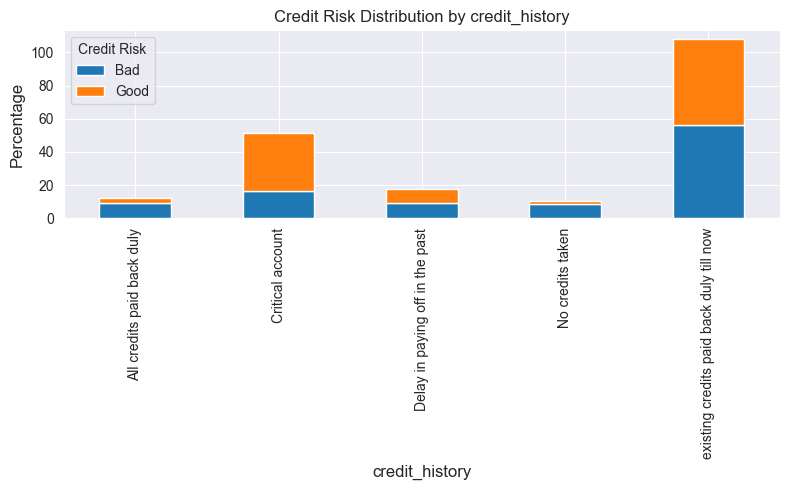

credit_risk            Bad   Good
purpose                          
business             11.33   9.00
domestic appliances   1.33   1.14
education             7.33   4.00
furniture/equipment  19.33  17.57
new car              29.67  20.71
other                 1.67   1.00
radio/television     20.67  31.14
repairs               2.67   2.00
retraining            0.33   1.14
used car              5.67  12.29


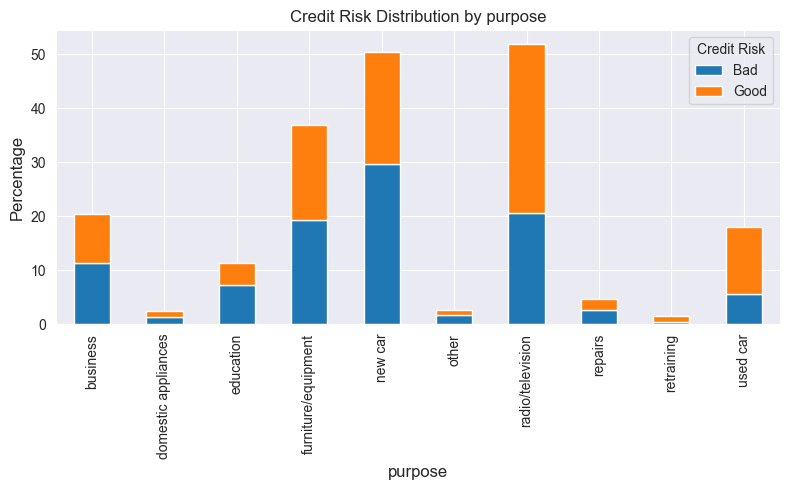

credit_risk                   Bad   Good
savings_account_status                  
100 <=...< 500 DM           11.33   9.86
500 <=...< 1000 DM           3.67   7.43
< 100 DM                    72.33  55.14
>= 1000 DM                   2.00   6.00
unknown/no savings account  10.67  21.57


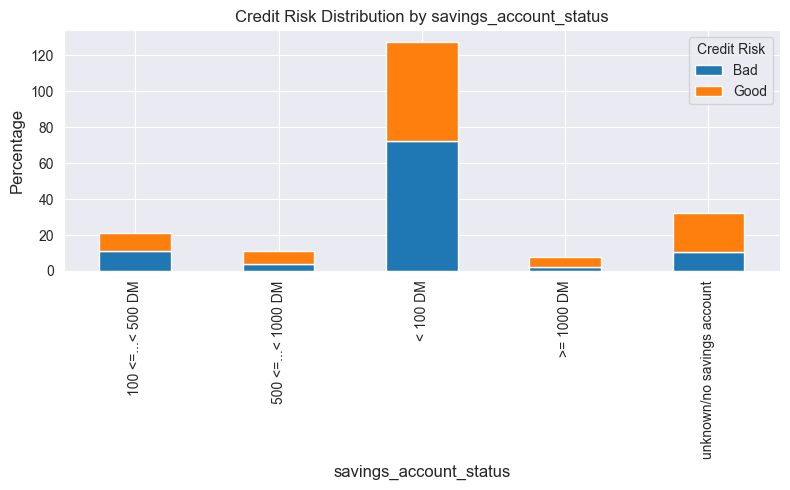

credit_risk                 Bad   Good
present_employment_range              
1 <=...< 4 years          34.67  33.57
4 <=...< 7 years          13.00  19.29
< 1 year                  23.33  14.57
>= 7 years                21.33  27.00
unemployed                 7.67   5.57


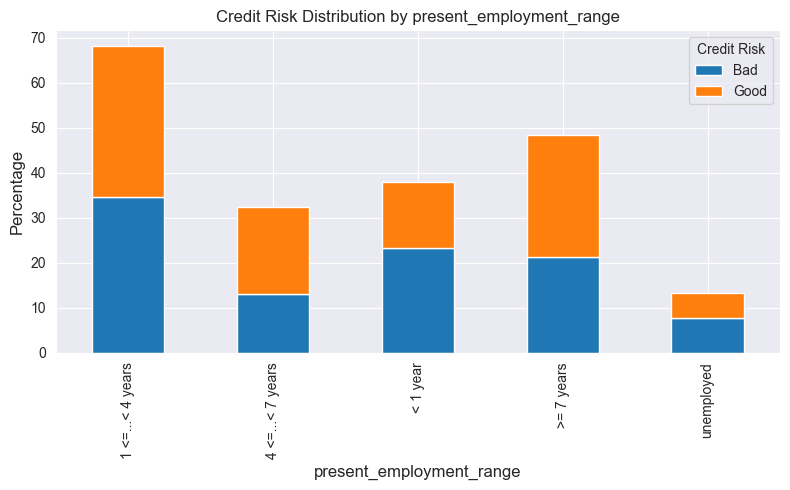

credit_risk                   Bad   Good
personal_status_and_sex                 
female/not single           36.33  28.71
male/divorced or separated   6.67   4.29
male/married or widowed      8.33   9.57
male/single                 48.67  57.43


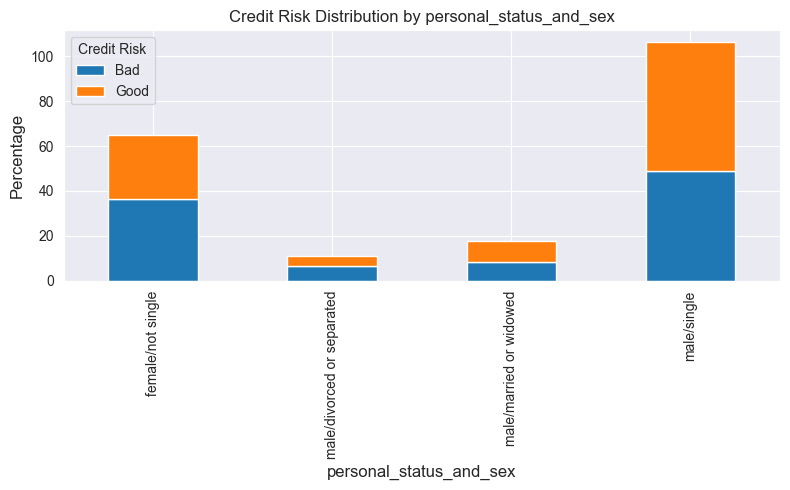

credit_risk                   Bad   Good
coapplicants_and_guarantor              
co-applicant                 6.00   3.29
guarantor                    3.33   6.00
none                        90.67  90.71


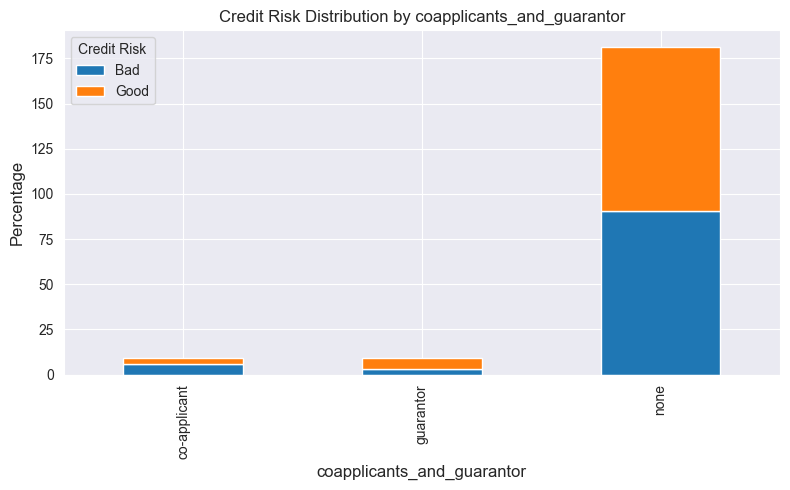

credit_risk                                          Bad   Good
property_type                                                  
building society savings agreement/life insurance  23.67  23.00
car or other                                       34.00  32.86
real estate                                        20.00  31.71
unknown/no property                                22.33  12.43


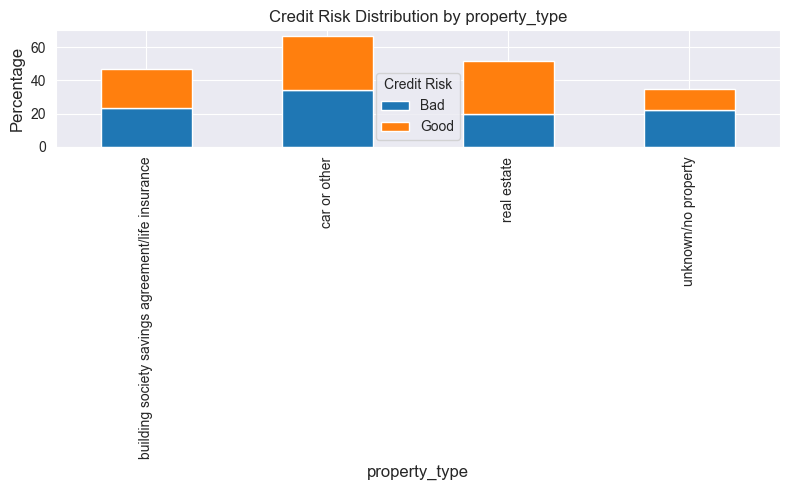

credit_risk                Bad   Good
other_installment_plans              
bank                     19.00  11.71
none                     74.67  84.29
stores                    6.33   4.00


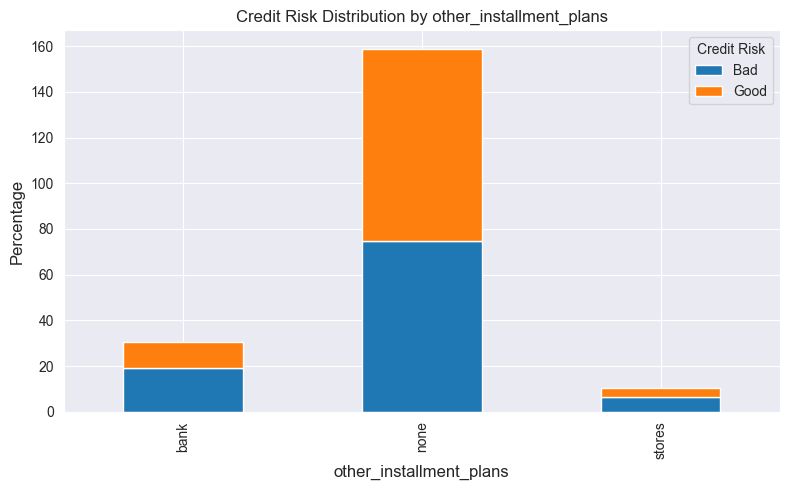

credit_risk       Bad   Good
housing_status              
for free        14.67   9.14
owner           62.00  75.29
renter          23.33  15.57


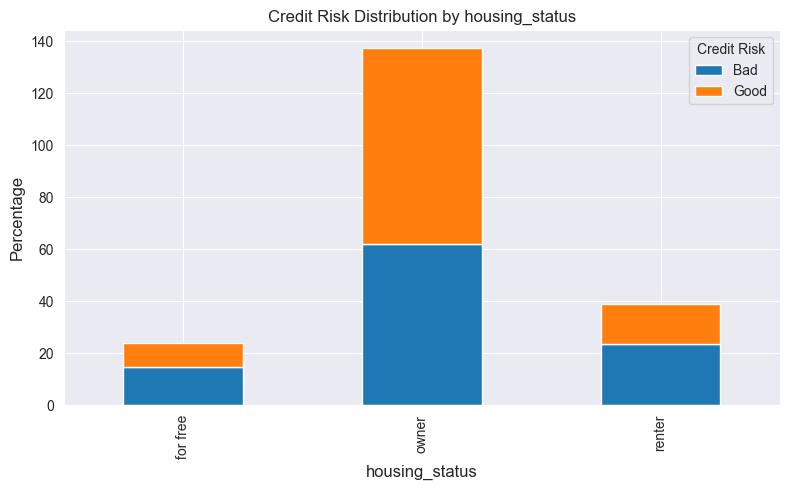

credit_risk                                           Bad   Good
job_type                                                        
management/self-employed/highly qualified emplo...  17.00  13.86
skilled employee/official                           62.00  63.43
unskilled non-resident                               2.33   2.14
unskilled resident                                  18.67  20.57


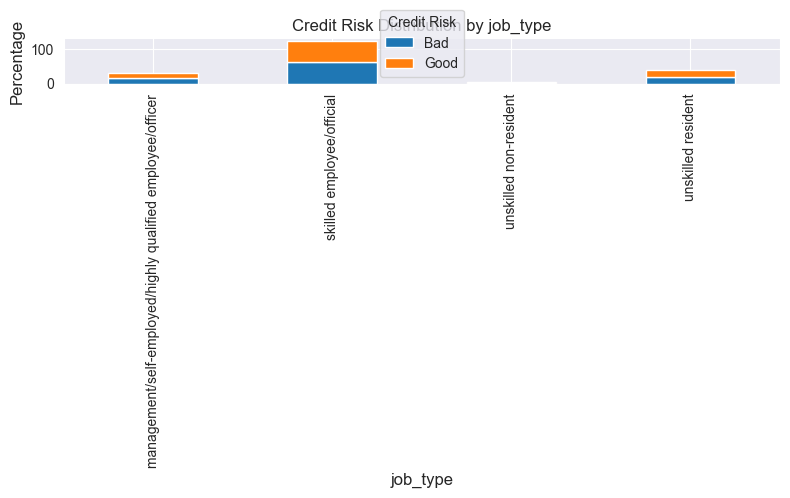

credit_risk         Bad   Good
telephone_status              
none              62.33  58.43
yes               37.67  41.57


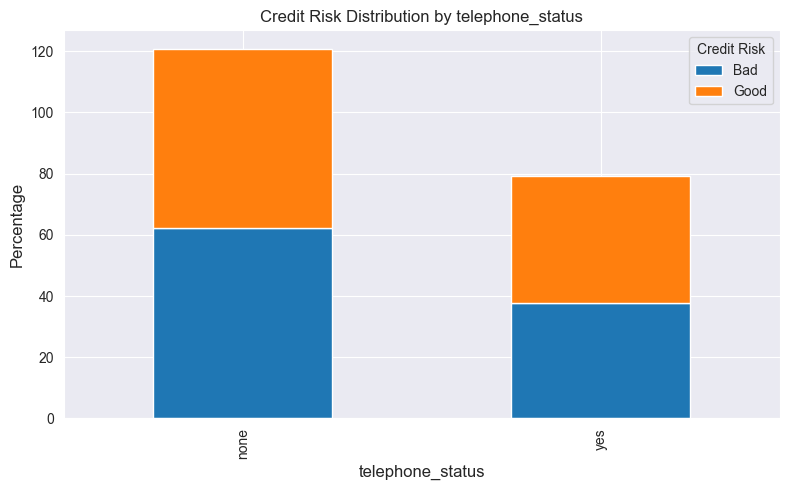

credit_risk              Bad   Good
foreign_worker_status              
no                      1.33   4.71
yes                    98.67  95.29


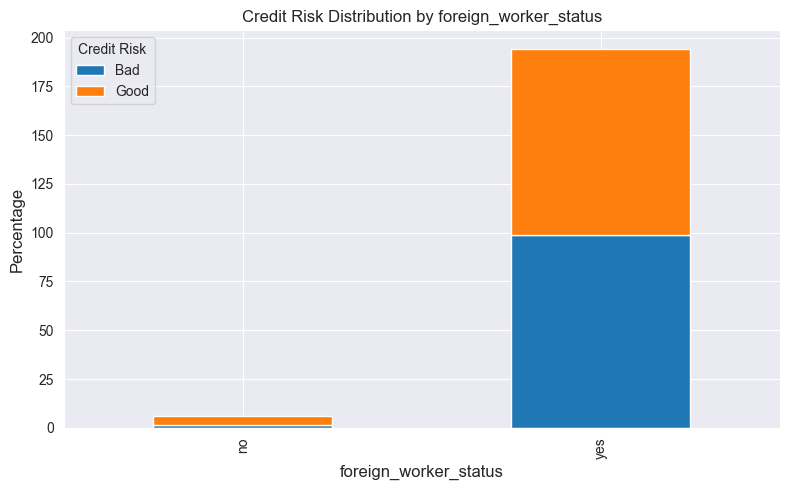

credit_risk    Bad   Good
credit_risk              
Bad          100.0    0.0
Good           0.0  100.0


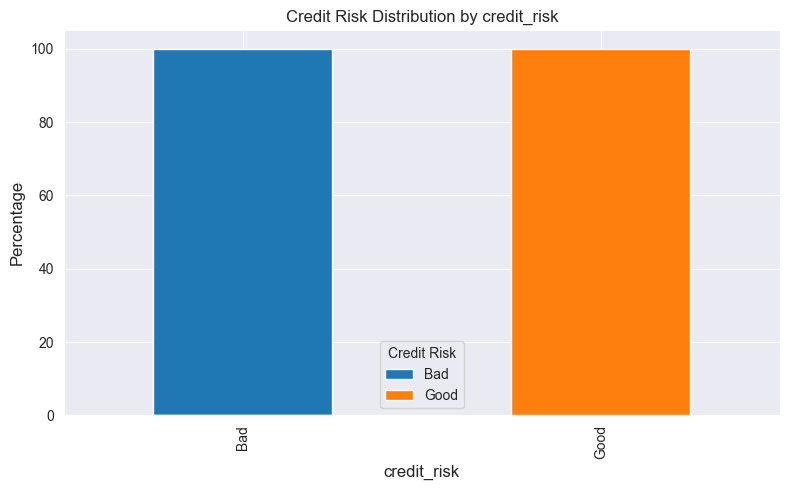

In [27]:
for col in categorical_columns:
    col_contingency_table_pct = pd.crosstab(df[col], df['credit_risk'],
                                            normalize='columns') * 100
    print(col_contingency_table_pct.round(2))
    col_contingency_table_pct.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'Credit Risk Distribution by {col}', fontsize = 12)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.legend(title='Credit Risk')
    plt.tight_layout()
    plt.show()

# 3. Outlier Handling

## 3.1 Applying Log Transformation to Continuous, Long-Tailed Variables

Original skew: 1.09
Transformed skew: -0.05


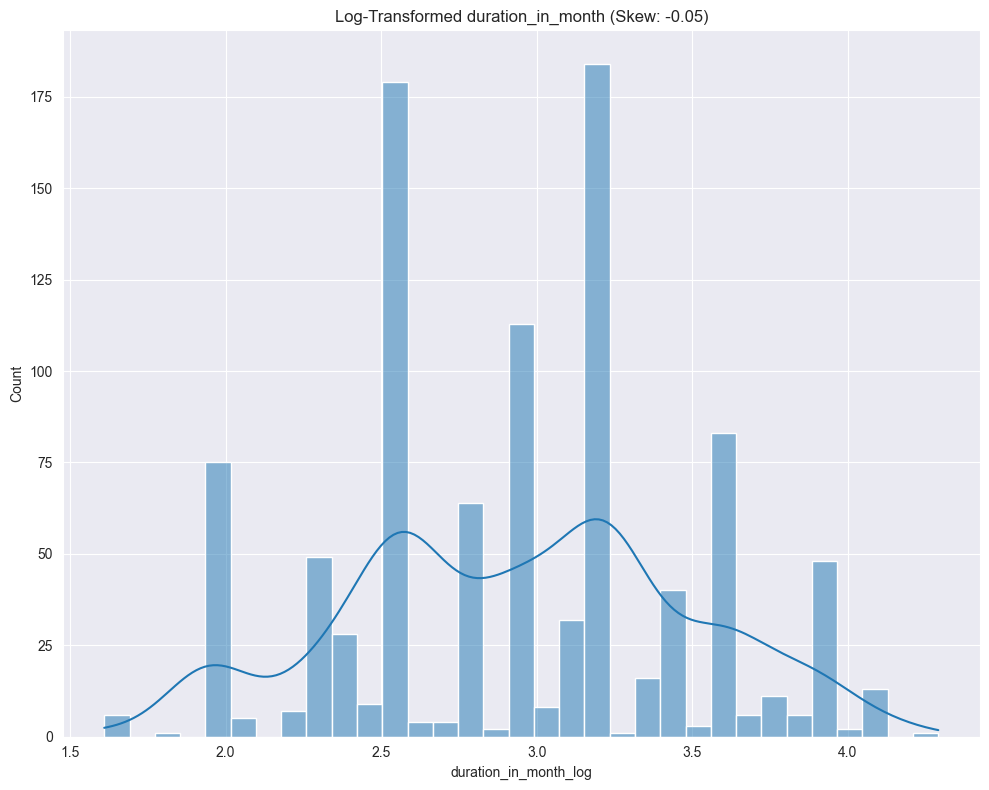

Original skew: 1.95
Transformed skew: 0.13


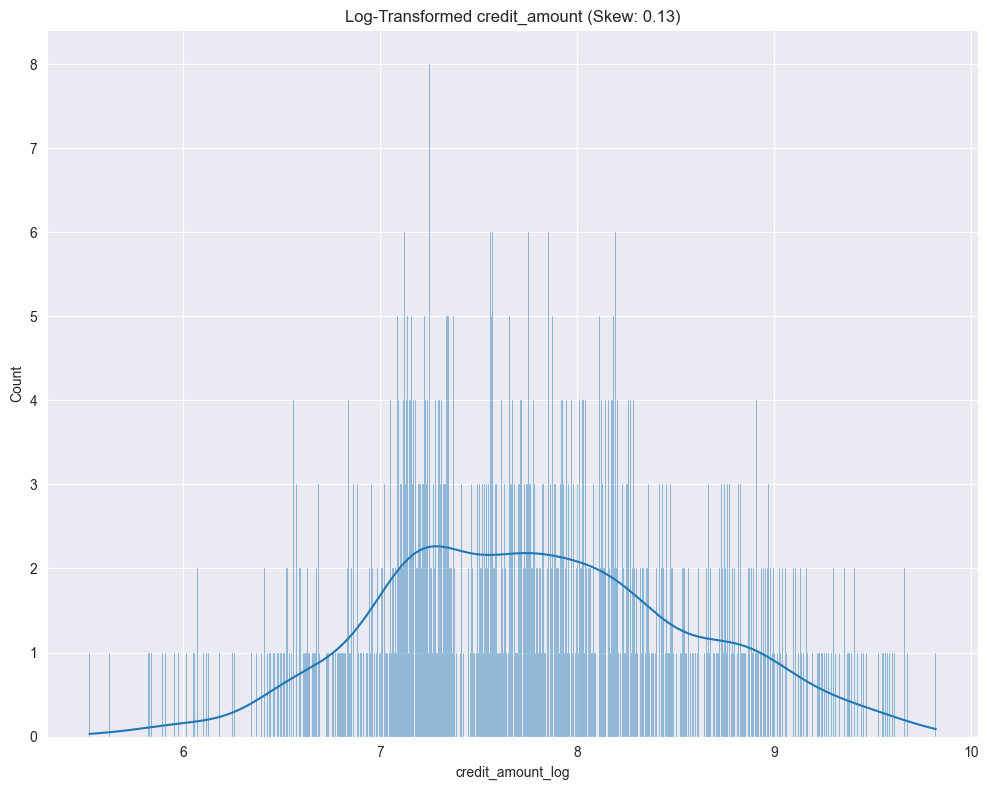

In [38]:
df_processed = df.copy()

for col in ['duration_in_month', 'credit_amount']:
    if col in df_processed.columns:
        if (df_processed[col] >= 0).all():
            original_skew = df_processed[col].skew()
            df_processed[f'{col}_log'] = np.log1p(df_processed[col])
            transformed_skew = df_processed[f'{col}_log'].skew()

            print(f'Original skew: {original_skew:.2f}')
            print(f'Transformed skew: {transformed_skew:.2f}')

            plt.figure(figsize=[10,8])
            sns.histplot(data=df_processed[f'{col}_log'], kde=True, bins=len
            (df_processed[col].unique()))
            plt.title(f'Log-Transformed {col} (Skew: {transformed_skew:.2f})')
            plt.xlabel(f'{col}_log')
            plt.ylabel('Count')
            plt.tight_layout()
            plt.show()
        else:
            print(f'Skipped Log Transformation for {col}\nReason: Contains '
                  f'Negative Values')
    else:
        print(f'Column {col} not found')
